<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2

# Problem Statement

### Contents:
- Background
- Data Import & Cleaning
- Exploratory Data Analysis
- Fixing Data from EDA
- Test
- Conclusions and Recommendations

# Background

Many Americans are concerned about purchasing and selling homes since some properties are expensive, and relocating for business or personal reasons is typical in countries as vast as the United States. Immigrants and emigrants in Ames, Iowa, are no exception when it comes to purchasing and selling real estate. They, like everyone else, would like to negotiate and buy/sell their property for a price that is regarded reasonable by the market (based on previous SalePrice), minimizing their losses (if the owners are desperate) or making a small profit.




### Data Choosen

* [`test.csv`](./data/test.csv): Test data of housing variables in Ames
* [`train.csv`](./data/train.csv): Train data of housing variables in Ames

### Outside Research

1) Floor-to-lot ratio is ratio of your house total circumference divided by the total square feet of your lot, and it is usually considered when pricing a house. (https://www.investopedia.com/terms/f/floor-area-ratio.asp)

2) lot frontage means the horizontal distance between the side lot lines measured along the front lot line but where the front lot line is not a straight line, or where the side lot lines are not parallel. (https://www.gimme-shelter.com/frontage-50043/) 

3) When determining the market worth of your property, size is a key factor to consider, as a larger home can increase its value. The price per square foot of a home is calculated by dividing the sales price by the square footage of the home. Let's say a house with 2,000 square feet sells for 200,000 dollar. It would cost 100 dollar per square foot.. (https://www.opendoor.com/w/blog/factors-that-influence-home-value#:~:text=When%20estimating%20your%20home's%20market,foot%20house%20sold%20for%20%24200%2C000.)


In [1]:
# Imports:

from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
import pandas as pd
import numpy as np
from pandas import read_csv
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
import math 
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import array as arr
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import r2_score
from scipy.stats import f_oneway
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy
from scipy import stats
from scipy.special import boxcox1p
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import mean_squared_error



# Data Import and Cleaning

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head(10)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500
5,138,535126040,20,RL,137.0,16492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,6,2010,WD,190000
6,2827,908186070,180,RM,35.0,3675,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,6,2006,New,140000
7,145,535154050,20,RL,NaN,12160,Pave,NaN,IR1,Lvl,...,0,0,NaN,MnPrv,NaN,0,5,2010,COD,142000
8,1942,535353130,20,RL,NaN,15783,Pave,NaN,Reg,Lvl,...,0,0,NaN,MnPrv,Shed,400,6,2007,WD,112500
9,1956,535426130,60,RL,70.0,11606,Pave,NaN,IR1,HLS,...,0,0,NaN,NaN,NaN,0,9,2007,WD,135000


In [4]:
df.tail(10)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
2041,1065,528166120,60,RL,110.0,13688,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2008,WD,412500
2042,2842,909101080,50,RL,45.0,8248,Pave,Grvl,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,9,2006,COD,83000
2043,2011,903227140,70,RM,50.0,6000,Pave,NaN,Reg,Lvl,...,0,0,NaN,GdWo,NaN,0,2,2007,WD,128000
2044,1140,531382090,60,RL,65.0,8453,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2008,WD,182000
2045,1051,528102030,20,RL,96.0,12444,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,11,2008,New,394617
2046,1587,921126030,20,RL,79.0,11449,Pave,NaN,IR1,HLS,...,0,0,NaN,NaN,NaN,0,1,2008,WD,298751
2047,785,905377130,30,RL,NaN,12342,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2009,WD,82500
2048,916,909253010,50,RL,57.0,7558,Pave,NaN,Reg,Bnk,...,0,0,NaN,NaN,NaN,0,3,2009,WD,177000
2049,639,535179160,20,RL,80.0,10400,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,11,2009,WD,144000
2050,10,527162130,60,RL,60.0,7500,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,6,2010,WD,189000


In [5]:
df.describe

<bound method NDFrame.describe of         Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      109  533352170           60        RL           NaN     13517   Pave   
1      544  531379050           60        RL          43.0     11492   Pave   
2      153  535304180           20        RL          68.0      7922   Pave   
3      318  916386060           60        RL          73.0      9802   Pave   
4      255  906425045           50        RL          82.0     14235   Pave   
...    ...        ...          ...       ...           ...       ...    ...   
2046  1587  921126030           20        RL          79.0     11449   Pave   
2047   785  905377130           30        RL           NaN     12342   Pave   
2048   916  909253010           50        RL          57.0      7558   Pave   
2049   639  535179160           20        RL          80.0     10400   Pave   
2050    10  527162130           60        RL          60.0      7500   Pave   

     Alley Lot Sh

In [6]:
df.isnull().sum()
df_missing_value = df.isnull().sum()
df_missing_value = df_missing_value[(df_missing_value>0)]    
df_missing_value

Lot Frontage       330
Alley             1911
Mas Vnr Type        22
Mas Vnr Area        22
Bsmt Qual           55
Bsmt Cond           55
Bsmt Exposure       58
BsmtFin Type 1      55
BsmtFin SF 1         1
BsmtFin Type 2      56
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1000
Garage Type        113
Garage Yr Blt      114
Garage Finish      114
Garage Cars          1
Garage Area          1
Garage Qual        114
Garage Cond        114
Pool QC           2042
Fence             1651
Misc Feature      1986
dtype: int64

## Imputing for Missing Data

In [7]:
#Mas Vnr Type (KNNImputer)
iterative_df = df[['Lot Area', '1st Flr SF', 'Lot Frontage']]
impute_it = IterativeImputer()
imputed_lot_front = impute_it.fit_transform(iterative_df)
imputed_lot_front = pd.DataFrame(imputed_lot_front, columns=['2', '1', '0'])
imputed_lot_front.columns = ["0","1","Lot Frontage"]
df["Lot Frontage"] = imputed_lot_front["Lot Frontage"]
print(df["Lot Frontage"])

0       71.315136
1       43.000000
2       68.000000
3       73.000000
4       82.000000
          ...    
2046    79.000000
2047    70.724765
2048    57.000000
2049    80.000000
2050    60.000000
Name: Lot Frontage, Length: 2051, dtype: float64


In [8]:
#Mas Vnr Type (KNNImputer)
df.rename(columns = {'Mas Vnr Type':'Mas_Vnr_Type'}, inplace = True)
df['Mas_Vnr_Type_map'] = df.Mas_Vnr_Type.map({'BrkCmn':0, 'BrkFace':1, 'CBlock':2, 'None':3, 'Stone':4})
knn_impute = KNNImputer(n_neighbors=45)
df_knn = knn_impute.fit_transform(df[['Mas_Vnr_Type_map']])
df_knn = pd.DataFrame(df_knn, columns=['Mas_Vnr_Type'])
df_knn = df_knn.round()
df["Mas_Vnr_Type"] = df_knn["Mas_Vnr_Type"]
df = df.drop('Mas_Vnr_Type_map', axis =1)
print(df["Mas_Vnr_Type"])

0       1.0
1       1.0
2       3.0
3       3.0
4       3.0
       ... 
2046    3.0
2047    3.0
2048    3.0
2049    3.0
2050    3.0
Name: Mas_Vnr_Type, Length: 2051, dtype: float64


In [9]:
#Mas Vnr Area (Fillna = 0 - all Cbloack mas Vnr type has nan value; 0 squaremeter for each cblock)
df_Mas_mean = df[['Mas_Vnr_Type', 'Mas Vnr Area']]
df_BrkCmn_mean = df_Mas_mean.loc[df_Mas_mean['Mas_Vnr_Type'] == 0]
df_BrkFace_mean = df_Mas_mean.loc[df_Mas_mean['Mas_Vnr_Type'] == 1]
df_CBlock_mean = df_Mas_mean.loc[df_Mas_mean['Mas_Vnr_Type'] == 2]
df_None_mean = df_Mas_mean.loc[df_Mas_mean['Mas_Vnr_Type'] == 3]
df_Stone_mean = df_Mas_mean.loc[df_Mas_mean['Mas_Vnr_Type'] == 4]

df_BrkCmn_mean_sum = df_BrkCmn_mean.isnull().sum()
df_BrkFace_mean_sum = df_BrkFace_mean.isnull().sum()
df_CBlock_mean_sum = df_CBlock_mean.isnull().sum() #Shows that only Cblock has Nan Values
df_None_mean_sum = df_None_mean.isnull().sum()
df_Stone_mean_sum = df_Stone_mean.isnull().sum() 

df['Mas Vnr Area'] = df['Mas Vnr Area'].fillna(0)
print(df["Mas Vnr Area"])

0       289.0
1       132.0
2         0.0
3         0.0
4         0.0
        ...  
2046      0.0
2047      0.0
2048      0.0
2049      0.0
2050      0.0
Name: Mas Vnr Area, Length: 2051, dtype: float64


In [10]:
#Garage Qual (KNNImputer)
df.rename(columns = {'Garage Qual':'GarageQual'}, inplace = True)
df['GarageQual'] = df.GarageQual.map({'Ex':0, 'Gd':1, 'TA':2, 'Fa':3, 'Po':4, 'NA':5})
knn_impute = KNNImputer(n_neighbors=45)
df_knn1 = knn_impute.fit_transform(df[['GarageQual']])
df_knn1 = pd.DataFrame(df_knn1, columns=['0'])
df_knn1 = df_knn1.round()
df_knn1.columns = ['Garage Qual']
df["GarageQual"] = df_knn1["Garage Qual"]
print(df["GarageQual"])

0       2.0
1       2.0
2       2.0
3       2.0
4       2.0
       ... 
2046    2.0
2047    2.0
2048    3.0
2049    2.0
2050    2.0
Name: GarageQual, Length: 2051, dtype: float64


In [11]:
#Garage Cond (Mode - same nan replacement as KNNimputer)
df.rename(columns = {'Garage Cond':'GarageCond'}, inplace = True)
df['GarageCond'] = df['GarageCond'].fillna(df['GarageCond'].mode()[0])
df['GarageCond'] = df.GarageCond.map({'Ex':0, 'Gd':1, 'TA':2, 'Fa':3, 'Po':4, 'NA':5})
print(df["GarageCond"])

0       2
1       2
2       2
3       2
4       2
       ..
2046    2
2047    2
2048    3
2049    2
2050    2
Name: GarageCond, Length: 2051, dtype: int64


In [12]:
#Bsmt Qual (KNNImputer)
df.rename(columns = {'Bsmt Qual':'Bsmt_Qual'}, inplace = True)
df['Bsmt_Qual'] = df.Bsmt_Qual.map({'Ex':0, 'Gd':1, 'TA':2, 'Fa':3, 'Po':4, 'NA':5})
knn_impute = KNNImputer(n_neighbors=45)
df_knn2 = knn_impute.fit_transform(df[['Bsmt_Qual']])
df_knn2 = pd.DataFrame(df_knn2, columns=['0'])
df_knn2 = df_knn2.round()
df_knn2.columns = ['Bsmt_Qual']
df["Bsmt_Qual"] = df_knn2["Bsmt_Qual"]
print(df["Bsmt_Qual"])

0       2.0
1       1.0
2       2.0
3       1.0
4       3.0
       ... 
2046    1.0
2047    2.0
2048    2.0
2049    2.0
2050    2.0
Name: Bsmt_Qual, Length: 2051, dtype: float64


In [13]:
#Bsmt Cond (KNNImputer)
df.rename(columns = {'Bsmt Cond':'Bsmt_Cond'}, inplace = True)
df['Bsmt_Cond'] = df.Bsmt_Cond.map({'Ex':0, 'Gd':1, 'TA':2, 'Fa':3, 'Po':4, 'NA':5})
print(df['Bsmt_Cond'])
knn_impute = KNNImputer(n_neighbors=45)
df_knn3 = knn_impute.fit_transform(df[['Bsmt_Cond']])
df_knn3 = pd.DataFrame(df_knn3, columns=['0'])
df_knn3 = df_knn3.round()
df_knn3.columns = ['Bsmt_Cond']
df["Bsmt_Cond"] = df_knn3["Bsmt_Cond"]
print(df["Bsmt_Cond"])

0       2.0
1       2.0
2       2.0
3       2.0
4       1.0
       ... 
2046    2.0
2047    2.0
2048    2.0
2049    2.0
2050    2.0
Name: Bsmt_Cond, Length: 2051, dtype: float64
0       2.0
1       2.0
2       2.0
3       2.0
4       1.0
       ... 
2046    2.0
2047    2.0
2048    2.0
2049    2.0
2050    2.0
Name: Bsmt_Cond, Length: 2051, dtype: float64


In [14]:
#Bsmt Exposure (KNNImputer)
df.rename(columns = {'Bsmt Exposure':'BsmtExposure'}, inplace = True)
df['BsmtExposure'] = df.BsmtExposure.map({'Gd':0, 'Av':1, 'Mn':2, 'No':3, 'NA':4})
print(df['BsmtExposure'])
knn_impute = KNNImputer(n_neighbors=45)
df_knn4 = knn_impute.fit_transform(df[['BsmtExposure']])
df_knn4 = pd.DataFrame(df_knn4, columns=['0'])
df_knn4 = df_knn4.round()
df_knn4.columns = ['BsmtExposure']
df["BsmtExposure"] = df_knn4["BsmtExposure"]
print(df["BsmtExposure"])

0       3.0
1       3.0
2       3.0
3       3.0
4       3.0
       ... 
2046    1.0
2047    3.0
2048    3.0
2049    3.0
2050    3.0
Name: BsmtExposure, Length: 2051, dtype: float64
0       3.0
1       3.0
2       3.0
3       3.0
4       3.0
       ... 
2046    1.0
2047    3.0
2048    3.0
2049    3.0
2050    3.0
Name: BsmtExposure, Length: 2051, dtype: float64


In [15]:
#BsmtFin Type 1 (KNNImputer)
df.rename(columns = {'BsmtFin Type 1':'BsmtFinType1'}, inplace = True)
df['BsmtFinType1'] = df.BsmtFinType1.map({'GLQ':6, 'ALQ':5 , 'BLQ':4, 'Rec':3, 'Lwq':2, 'Unf':1, 'NA':0})
print(df['BsmtFinType1'])
knn_impute = KNNImputer(n_neighbors=45)
df_knn5 = knn_impute.fit_transform(df[['BsmtFinType1']])
df_knn5 = pd.DataFrame(df_knn5, columns=['0'])
df_knn5 = df_knn5.round()
df["BsmtFinType1"] = df_knn5["0"]
print(df["BsmtFinType1"])

0       6.0
1       6.0
2       6.0
3       1.0
4       1.0
       ... 
2046    6.0
2047    4.0
2048    1.0
2049    3.0
2050    1.0
Name: BsmtFinType1, Length: 2051, dtype: float64
0       6.0
1       6.0
2       6.0
3       1.0
4       1.0
       ... 
2046    6.0
2047    4.0
2048    1.0
2049    3.0
2050    1.0
Name: BsmtFinType1, Length: 2051, dtype: float64


In [16]:
#BsmtFin SF 1 (KNNImputer)
dftrans = df[['BsmtFinType1', 'BsmtFin SF 1']]
dftrans1 = dftrans.loc[dftrans['BsmtFin SF 1'].isna()] #The only null value in this variable correspond with an Average Quality Type 1 Basement(ALQ:2)
dftrans2 = dftrans.loc[dftrans['BsmtFinType1'] == 2]
dftrans2 = dftrans2['BsmtFin SF 1'].median()#median of SF mode of SF of all unfinished basement type 1 is 377
df['BsmtFin SF 1'] = df['BsmtFin SF 1'].fillna(377.0)#replace missing value with Median
print(df["BsmtFin SF 1"])

0        533.0
1        637.0
2        731.0
3          0.0
4          0.0
         ...  
2046    1011.0
2047     262.0
2048       0.0
2049     155.0
2050       0.0
Name: BsmtFin SF 1, Length: 2051, dtype: float64


In [17]:
#BsmtFin Type 2 (KNNImputer)
df.rename(columns = {'BsmtFin Type 2':'BsmtFinType2'}, inplace = True)
df['BsmtFinType2'] = df.BsmtFinType2.map({'GLQ':6, 'ALQ':5 , 'BLQ':4, 'Rec':3, 'Lwq':2, 'Unf':1, 'NA':0})
print(df['BsmtFinType2'])
knn_impute = KNNImputer(n_neighbors=45)
df_knn6 = knn_impute.fit_transform(df[['BsmtFinType2']])
df_knn6 = pd.DataFrame(df_knn6, columns=['0'])
df_knn6 = df_knn6.round()
df["BsmtFinType2"] = df_knn6["0"]
print(df["BsmtFinType2"])

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
2046    1.0
2047    1.0
2048    1.0
2049    NaN
2050    1.0
Name: BsmtFinType2, Length: 2051, dtype: float64
0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
2046    1.0
2047    1.0
2048    1.0
2049    1.0
2050    1.0
Name: BsmtFinType2, Length: 2051, dtype: float64


In [18]:
#BsmtFin SF 2 (Mode based on basement type 2 - Basement Squarefoot 2 nan because basement type 2 is unfinished)
dftrans = df[['BsmtFinType2', 'BsmtFin SF 2']]
dftrans1 = dftrans.loc[dftrans['BsmtFin SF 2'].isna()] #The only null value in this variable correspond with an Unfinshed Type 2 basement(Unf:5)
dftrans2 = dftrans.loc[dftrans['BsmtFinType2'] == 2] #shows that majority of values are 0 (mean/median not viable)
dftrans2 = dftrans2['BsmtFin SF 2'].mode() #mode of SF of all unfinished basement type 2 is 0
df['BsmtFin SF 2'] = df['BsmtFin SF 2'].fillna(0)#replace missing value with Median
print(df["BsmtFin SF 2"])

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
        ...  
2046      0.0
2047      0.0
2048      0.0
2049    750.0
2050      0.0
Name: BsmtFin SF 2, Length: 2051, dtype: float64


In [19]:
#Total Bsmt SF (Median base on basement type 1 - value is nan because basement 1 is unfinished)
dftrans = df[['BsmtFinType2', 'BsmtFinType1', 'Total Bsmt SF']]
dftrans1 = dftrans.loc[dftrans['Total Bsmt SF'].isna()] #Null Value is associate with a finished Average type 1 Basement and an unfinished type 2 basement
dftrans2 = dftrans.loc[dftrans['BsmtFinType1'] == 2] #Use finished Type 1 basement to fill NaN
dftrans2 = dftrans2['Total Bsmt SF'].median() #median of total SF of all unfinished basement type 1 is 919
df['Total Bsmt SF'] = df['Total Bsmt SF'].fillna(919)#replace missing value with Median
print(df["Total Bsmt SF"])

0        725.0
1        913.0
2       1057.0
3        384.0
4        676.0
         ...  
2046    1884.0
2047     861.0
2048     896.0
2049    1200.0
2050     994.0
Name: Total Bsmt SF, Length: 2051, dtype: float64


In [20]:
#Bsmt Full Bath (KNNImputer)
df.rename(columns = {'Bsmt Full Bath':'BsmtFullBath'}, inplace = True)
print(df['BsmtFullBath'])
knn_impute = KNNImputer(n_neighbors=45)
df_knn7 = knn_impute.fit_transform(df[['BsmtFullBath']])
df_knn7 = pd.DataFrame(df_knn7, columns=['0'])
df_knn7 = df_knn7.round()
df["BsmtFullBath"] = df_knn7["0"]
print(df["BsmtFullBath"])

0       0.0
1       1.0
2       1.0
3       0.0
4       0.0
       ... 
2046    1.0
2047    0.0
2048    0.0
2049    1.0
2050    0.0
Name: BsmtFullBath, Length: 2051, dtype: float64
0       0.0
1       1.0
2       1.0
3       0.0
4       0.0
       ... 
2046    1.0
2047    0.0
2048    0.0
2049    1.0
2050    0.0
Name: BsmtFullBath, Length: 2051, dtype: float64


In [21]:
#Bsmt Half Bath (KNNImputer)
df.rename(columns = {'Bsmt Half Bath':'BsmtHalfBath'}, inplace = True)
print(df['BsmtHalfBath'])
knn_impute = KNNImputer(n_neighbors=45)
df_knn8 = knn_impute.fit_transform(df[['BsmtHalfBath']])
df_knn8 = pd.DataFrame(df_knn8, columns=['0'])
df_knn8 = df_knn8.round()
df["BsmtHalfBath"] = df_knn8["0"]
print(df["BsmtHalfBath"])

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
2046    0.0
2047    0.0
2048    0.0
2049    0.0
2050    0.0
Name: BsmtHalfBath, Length: 2051, dtype: float64
0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
2046    0.0
2047    0.0
2048    0.0
2049    0.0
2050    0.0
Name: BsmtHalfBath, Length: 2051, dtype: float64


In [22]:
#FirePlace Qu (KNNImputer)
df.rename(columns = {'Fireplace Qu':'FireplaceQu'}, inplace = True)
df['FireplaceQu'] = df.FireplaceQu.map({'Ex':0, 'Gd':1, 'TA':2, 'Fa':3, 'Po':4, 'NA':5})
knn_impute = KNNImputer(n_neighbors=20)
df_knn8 = knn_impute.fit_transform(df[['FireplaceQu']])
df_knn8 = pd.DataFrame(df_knn8, columns=['0'])
df_knn8 = df_knn8.round()
df["FireplaceQu"] = df_knn8["0"]
print(df["FireplaceQu"])

0       2.0
1       2.0
2       2.0
3       2.0
4       2.0
       ... 
2046    1.0
2047    2.0
2048    2.0
2049    1.0
2050    2.0
Name: FireplaceQu, Length: 2051, dtype: float64


In [23]:
#Garage Cars, Garage Area (IterativeImputer - linear regression with Garage Type, Garage Cars, Garage Area)
iterative_df = df[['Garage Type', 'Garage Cars', 'Garage Area']]
iterative_df_cor = iterative_df.corr(method='pearson')
iterative_df.rename(columns = {'Garage Type':'GarageType'}, inplace = True)
iterative_df['GarageType'] = iterative_df.GarageType.map({'2Types':0, 'Attchd':1, 'Basment':2, 'Builtin':3, 'CarPort':4, 'Detchd':5, 'NA':6})
impute_it = IterativeImputer()
imputed_df = impute_it.fit_transform(iterative_df)
imputed_df = pd.DataFrame(imputed_df, columns=['Garage Type', 'Garage Cars', 'Garage Area'])
imputed_df['Garage Cars'] = imputed_df['Garage Cars'].round()
df[["Garage Cars","Garage Area"]] = imputed_df[["Garage Cars","Garage Area"]]
print(df[["Garage Cars","Garage Area"]])

      Garage Cars  Garage Area
0             2.0        475.0
1             2.0        559.0
2             1.0        246.0
3             2.0        400.0
4             2.0        484.0
...           ...          ...
2046          2.0        520.0
2047          2.0        539.0
2048          2.0        342.0
2049          1.0        294.0
2050          2.0        442.0

[2051 rows x 2 columns]


C:\Users\get gd nub\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
C:\Users\GETGDN~1\AppData\Local\Temp/ipykernel_6308/2915716711.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iterative_df['GarageType'] = iterative_df.GarageType.map({'2Types':0, 'Attchd':1, 'Basment':2, 'Builtin':3, 'CarPort':4, 'Detchd':5, 'NA':6})
C:\Users\get gd nub\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:685: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warning

In [24]:
#Garage Type (KNNImputer)
df.rename(columns = {'Garage Type':'GarageType'}, inplace = True)
df['GarageType'] = df.GarageType.map({'2Types':0, 'Attchd':1, 'Basment':2, 'Builtin':3, 'CarPort':4, 'Detchd':5, 'NA':6})
print(df['GarageType'])
knn_impute = KNNImputer(n_neighbors=20)
df_knn9 = knn_impute.fit_transform(df[['GarageType']])
df_knn9 = pd.DataFrame(df_knn9, columns=['0'])
df_knn9 = df_knn9.round()
df["GarageType"] = df_knn9["0"]
print(df["GarageType"])


0       1.0
1       1.0
2       5.0
3       NaN
4       5.0
       ... 
2046    1.0
2047    5.0
2048    5.0
2049    1.0
2050    1.0
Name: GarageType, Length: 2051, dtype: float64
0       1.0
1       1.0
2       5.0
3       2.0
4       5.0
       ... 
2046    1.0
2047    5.0
2048    5.0
2049    1.0
2050    1.0
Name: GarageType, Length: 2051, dtype: float64


In [25]:
#Garage Finish (KNNImputer)
df.rename(columns = {'Garage Finish':'GarageFinish'}, inplace = True)
df['GarageFinish'] = df.GarageFinish.map({'Fin':0, 'RFn':1, 'Unf':2, 'NA':3})
print(df['GarageFinish'])
knn_impute = KNNImputer(n_neighbors=20)
df_knn10 = knn_impute.fit_transform(df[['GarageFinish']])
df_knn10 = pd.DataFrame(df_knn10, columns=['0'])
df_knn10 = df_knn10.round()
df["GarageFinish"] = df_knn10["0"]
print(df["GarageFinish"])


0       1.0
1       1.0
2       2.0
3       0.0
4       2.0
       ... 
2046    0.0
2047    2.0
2048    2.0
2049    2.0
2050    0.0
Name: GarageFinish, Length: 2051, dtype: float64
0       1.0
1       1.0
2       2.0
3       0.0
4       2.0
       ... 
2046    0.0
2047    2.0
2048    2.0
2049    2.0
2050    0.0
Name: GarageFinish, Length: 2051, dtype: float64


In [26]:
#Bsmt Unf SF (Median based on Basement type 2)
dftrans = df[['BsmtFinType2', 'BsmtFinType1', 'Bsmt Unf SF']]
dftrans1 = dftrans.loc[dftrans['Bsmt Unf SF'].isna()] #The null value in this variable is the corresponding Work in Progress of the type 2 Basement
dftrans2 = dftrans.loc[dftrans['BsmtFinType2'] == 5] 
dftrans2 = dftrans2['Bsmt Unf SF'].median() #median of SF of all unfinshed basement type 2 is 511.5
df['Bsmt Unf SF'] = df['Bsmt Unf SF'].fillna(511.5)#replace missing value with Median
print(df["Bsmt Unf SF"])

0       192.0
1       276.0
2       326.0
3       384.0
4       676.0
        ...  
2046    873.0
2047    599.0
2048    896.0
2049    295.0
2050    994.0
Name: Bsmt Unf SF, Length: 2051, dtype: float64


In [27]:
#Garage Yr Blt (IterativeImputer - linear regression with Garage Yr Built, Garage Cars, Garage Area)
iterative_df = df[['Garage Cars', 'Garage Area', 'Garage Yr Blt']]
impute_it = IterativeImputer()
imputed_gr_yr = impute_it.fit_transform(iterative_df)
imputed_gr_yr = pd.DataFrame(imputed_gr_yr, columns=['Garage Cars', 'Garage Area', 'Garage Yr Blt'])
imputed_gr_yr = imputed_gr_yr.round()
df["Garage Yr Blt"] = imputed_gr_yr["Garage Yr Blt"]
print(df["Garage Yr Blt"])

0       1976.0
1       1997.0
2       1953.0
3       2007.0
4       1957.0
         ...  
2046    2007.0
2047    1961.0
2048    1929.0
2049    1956.0
2050    1999.0
Name: Garage Yr Blt, Length: 2051, dtype: float64


In [28]:
df.isnull().sum()

Id              0
PID             0
MS SubClass     0
MS Zoning       0
Lot Frontage    0
               ..
Misc Val        0
Mo Sold         0
Yr Sold         0
Sale Type       0
SalePrice       0
Length: 81, dtype: int64

## Separating Categorical Data from Numerical Data

In [29]:
#df with no categorical data
df.columns = df.columns.str.replace(' ', '')
df_nocat = pd.read_csv('train.csv')
df_nocat.columns = df_nocat.columns.str.replace(' ', '')

df_nocat.select_dtypes(include=["object"]).columns.tolist()
df_nocat = df.drop(columns = ['MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1',
 'Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','Mas_Vnr_Type','ExterQual','ExterCond','Foundation',
 'Bsmt_Qual','Bsmt_Cond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual', 'Functional' ,
 'FireplaceQu', 'GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence','MiscFeature','SaleType'] )
df_cat = df_nocat[["OverallQual", "OverallCond"]] 
df_nocat = df_nocat.drop(columns = ["OverallQual", "OverallCond"]) 
df_nocat.head()

,Id,PID,MSSubClass,LotFrontage,LotArea,YearBuilt,YearRemod/Add,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,109,533352170,60,71.315136,13517,1976,2005,289.0,533.0,0.0,...,0,44,0,0,0,0,0,3,2010,130500
1,544,531379050,60,43.000000,11492,1996,1997,132.0,637.0,0.0,...,0,74,0,0,0,0,0,4,2009,220000
2,153,535304180,20,68.000000,7922,1953,2007,0.0,731.0,0.0,...,0,52,0,0,0,0,0,1,2010,109000
3,318,916386060,60,73.000000,9802,2006,2007,0.0,0.0,0.0,...,100,0,0,0,0,0,0,4,2010,174000
4,255,906425045,50,82.000000,14235,1900,1993,0.0,0.0,0.0,...,0,59,0,0,0,0,0,3,2010,138500


In [30]:
#df with all categorical data
df_allcat = pd.read_csv('train.csv')
df_allcat.columns = df_allcat.columns.str.replace(' ', '')
df_allcat.select_dtypes(exclude=["object"]).columns.tolist()
df_allcat = df.drop(columns = ['Id','PID','MSSubClass','LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt','YearRemod/Add','MasVnrArea',
 'BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath',
 'HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars','GarageArea',
 'WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch', 'YrSold','SalePrice'])
df_allcat = pd.concat([df_allcat, df_cat], axis = 1)
df_allcat.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,PavedDrive,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,OverallQual,OverallCond
0,RL,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,...,Y,0,NaN,NaN,NaN,0,3,WD,6,8
1,RL,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,...,Y,0,NaN,NaN,NaN,0,4,WD,7,5
2,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Y,0,NaN,NaN,NaN,0,1,WD,5,7
3,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,...,Y,0,NaN,NaN,NaN,0,4,WD,5,5
4,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,...,N,0,NaN,NaN,NaN,0,3,WD,6,8


## Label Enconding Ordinal Categorical Data

In [31]:
df_allcat['Neighborhood'].unique()

df_allcat['ExterQual'] = df_allcat.ExterQual.map({'Gd':2, 'TA':1, 'Ex':3, 'Fa':0})
df_allcat['ExterCond'] = df_allcat.ExterCond.map({'TA':2, 'Gd':3, 'Fa':1, 'Ex':4, 'Po':0})
df_allcat['HeatingQC'] = df_allcat.HeatingQC.map({'Ex':4, 'TA':2, 'Gd':3, 'Fa':1, 'Po':0})
df_allcat['KitchenQual'] = df_allcat.KitchenQual.map({'Gd':2, 'TA':1, 'Fa':0, 'Ex':3})
df_allcat['PoolQC'] = df_allcat.PoolQC.map({'Fa':0, 'Gd':2, 'Ex':3, 'TA':1})

df_allcat['FireplaceQu'] = df_allcat.FireplaceQu.map({0:5, 1:4, 2:3, 3:2, 4:1, 5:0}) #({'Gd':0, 'Av':1, 'Mn':2, 'No':3, 'NA':4})
df_allcat['BsmtExposure'] = df_allcat.BsmtExposure.map({0:3, 1:2, 2:1, 3:0, 4:0}) #({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0})
df_allcat['Bsmt_Cond'] = df_allcat.Bsmt_Cond.map({0:5, 1:4, 2:3, 3:2, 4:1, 5:0}) #({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0})
df_allcat['Bsmt_Qual'] = df_allcat.Bsmt_Qual.map({0:5, 1:4, 2:3, 3:2, 4:1, 5:0}) #({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0})
df_allcat['GarageCond'] = df_allcat.GarageCond.map({0:5, 1:4, 2:3, 3:2, 4:1, 5:0}) #({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0})
df_allcat['GarageQual'] = df_allcat.GarageQual.map({0:5, 1:4, 2:3, 3:2, 4:1, 5:0}) #({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0})

df_allcat['Mas_Vnr_Type'] = df_allcat.Mas_Vnr_Type.map({0:'BrkCmn', 1:'BrkFace', 2:'CBlock', 3:'None', 4:'Stone'})
df_allcat['GarageType'] = df_allcat.GarageType.map({0:'2Types', 1:'Attchd', 2:'Basment', 3:'Builtin', 4:'CarPort', 5:'Detchd', 6:'NA'})
df_allcat['GarageFinish'] = df_allcat.GarageFinish.map({0:'Fin', 1:'RFn', 2:'Unf', 3:'NA'})

df_allcat.select_dtypes(include=['object']).columns.tolist()
df_sp = df_nocat['SalePrice']
df_or = df_allcat[['FireplaceQu', 'BsmtExposure', 'Bsmt_Cond', 'Bsmt_Qual', 'GarageCond', 'GarageQual', 'OverallQual', 'OverallCond']]

In [32]:
#Spliting oridinal and nominal categorical
df_allcat_or = df_allcat[['ExterQual', 'ExterCond', 'HeatingQC', 'KitchenQual', 'PoolQC' ]]
df_allcat_or = pd.concat([df_allcat_or, df_sp], axis = 1)
df_allcat_or = pd.concat([df_allcat_or, df_or], axis = 1)

df_allcat_nor = df_allcat.drop( columns = ['ExterQual', 'ExterCond', 'HeatingQC', 'KitchenQual', 'PoolQC', 'PoolArea', 'MiscVal', 'MoSold', 'OverallQual', 'OverallCond'])
df_allcat_nor = pd.concat([df_allcat_nor, df_sp], axis = 1)
df_allcat_nor = df_allcat_nor.drop( columns = ['FireplaceQu', 'BsmtExposure', 'Bsmt_Cond', 'Bsmt_Qual', 'GarageCond', 'GarageQual'])

## Label Enconding Norminal Categorical Data (For Annova)

In [33]:
#Spliting oridinal and nominal categorical
df_allcat_or = df_allcat[['ExterQual', 'ExterCond', 'HeatingQC', 'KitchenQual', 'PoolQC' ]]
df_allcat_or = pd.concat([df_allcat_or, df_sp], axis = 1)
df_allcat_or = pd.concat([df_allcat_or, df_or], axis = 1)

df_allcat_nor = df_allcat.drop( columns = ['ExterQual', 'ExterCond', 'HeatingQC', 'KitchenQual', 'PoolQC', 'PoolArea', 'MiscVal', 'MoSold', 'OverallQual', 'OverallCond'])
df_allcat_nor = pd.concat([df_allcat_nor, df_sp], axis = 1)
df_allcat_nor = df_allcat_nor.drop( columns = ['FireplaceQu', 'BsmtExposure', 'Bsmt_Cond', 'Bsmt_Qual', 'GarageCond', 'GarageQual'])

#Nominal Categorical label encoded for correlation (Annova)
df_allcat_nor1 = df_allcat_nor.copy()

df_allcat_nor1['Exterior1st'] = df_allcat_nor1.Exterior1st.map({'HdBoard':0, 'VinylSd':1, 'Wd Sdng':2, 'BrkFace':3, 'Plywood':4, 'MetalSd':5,
          'AsbShng':6, 'CemntBd':7, 'WdShing':8, 'Stucco':9, 'BrkComm':10, 'Stone':11,
          'CBlock':12, 'ImStucc':13, 'AsphShn':14})
df_allcat_nor1['Exterior2nd'] = df_allcat_nor1.Exterior2nd.map({ 'Plywood':0, 'VinylSd':1, 'Wd Sdng':2, 'HdBoard':3, 'MetalSd':4, 'AsbShng':5,
          'CmentBd':6, 'Wd Shng':7, 'BrkFace':8, 'Stucco':9, 'Brk Cmn':10, 'ImStucc':11,
          'Stone':12, 'CBlock':13, 'AsphShn':14})
df_allcat_nor1['Foundation'] = df_allcat_nor1.Foundation.map({'CBlock':0, 'PConc':1, 'BrkTil':2, 'Slab':3, 'Stone':4, 'Wood':5})
df_allcat_nor1['CentralAir'] = df_allcat_nor1.CentralAir.map({'Y':0, 'N':1})

df_allcat_nor1['Functional'] = df_allcat_nor1.Functional.map({'Typ':0, 'Mod':1, 'Min2':2, 'Maj1':3, 'Min1':4, 'Sev':5, 'Sal':6, 'Maj2':7})
df_allcat_nor1['MSZoning'] = df_allcat_nor1.MSZoning.map({'A (agr)':0, 'C (all)':1, 'FV':2, 'I (all)':3, 'RH':4, 'RL':5, 'RP':6, 'RM': 7})
df_allcat_nor1['Street'] = df_allcat_nor1.Street.map({'Grvl':0, 'Pave':1,'NA':2})
df_allcat_nor1['Alley'] = df_allcat_nor1.Alley.map({'Grvl':0, 'Pave':1,'NA':2})
df_allcat_nor1['LotShape'] = df_allcat_nor1.LotShape.map({'Reg':0, 'IR1':1,'IR2':2, 'IR3':3})   

df_allcat_nor1['LandContour'] = df_allcat_nor1.LandContour.map({'Lvl':0, 'Bnk':1, 'HLS':2, 'Low':3})
df_allcat_nor1['LotConfig'] = df_allcat_nor1.LotConfig.map({'Inside':0, 'Corner':1,'CulDSac':2, 'FR2':3, 'FR3':4})
df_allcat_nor1['LandSlope'] = df_allcat_nor1.LandSlope.map({'Gtl':0, 'Mod':1,'Sev':2})
df_allcat_nor1['Neighborhood'] = df_allcat_nor1.Neighborhood.map({'Sawyer':1, 'SawyerW':2, 'NAmes':3, 'Timber':4, 'Edwards':5, 'OldTown':6,
                                                        'BrDale':7, 'CollgCr':8, 'Somerst':9, 'Mitchel':10, 'StoneBr':11, 'NridgHt':12,
                                                        'Gilbert':12, 'Crawfor':13, 'IDOTRR':14, 'NWAmes':15, 'Veenker':16, 'MeadowV':17,
                                                        'SWISU':18, 'NoRidge':19, 'ClearCr':20, 'Blmngtn':21, 'BrkSide':22, 'NPkVill':23,
                                                        'Blueste':24, 'GrnHill':25, 'Greens':26, 'Landmrk':27})  

df_allcat_nor1['Utilities'] = df_allcat_nor1.Utilities.map({'AllPub':0, 'NoSeWa':1, 'NoSewr':2})
df_allcat_nor1['Condition1'] = df_allcat_nor1.Condition1.map({'RRAe':0, 'Norm':1, 'PosA':2, 'Artery':3, 'Feedr':4, 'PosN':5, 'RRAn':6, 'RRNe':7,'RRNn':8})
df_allcat_nor1['Condition2'] = df_allcat_nor1.Condition2.map({'RRAe':0, 'Norm':1, 'PosA':2, 'Artery':3, 'Feedr':4, 'PosN':5, 'RRAn':6, 'RRNe':7,'RRNn':8})

df_allcat_nor1['BldgType'] = df_allcat_nor1.BldgType.map({'1Fam':0, 'TwnhsE':1, 'Twnhs':2, '2fmCon':3, 'Duplex':4})
df_allcat_nor1['HouseStyle'] = df_allcat_nor1.HouseStyle.map({'2Story':0, '1Story':1, '1.5Fin':2, 'SFoyer':3, 'SLvl':4, '2.5Unf':5, '2.5Fin':6,'1.5Unf':7})
df_allcat_nor1['RoofStyle'] = df_allcat_nor1.RoofStyle.map({'Gable':0, 'Hip':1, 'Flat':2, 'Mansard':3, 'Shed':4, 'Gambrel':5})
df_allcat_nor1['RoofMatl'] = df_allcat_nor1.RoofMatl.map({'CompShg':0, 'WdShngl':1, 'Tar&Grv':2, 'WdShake':3, 'Membran':4, 'ClyTile':5})

df_allcat_nor1['Fence'] = df_allcat_nor1.Fence.map({'MnPrv':0, 'GdPrv':1, 'GdWo':2, 'MnWw':3})
df_allcat_nor1['MiscFeature'] = df_allcat_nor1.MiscFeature.map({'Shed':0, 'TenC':1, 'Gar2':2, 'Othr':3, 'Elev':4})
df_allcat_nor1['SaleType'] = df_allcat_nor1.SaleType.map({'WD ':1, 'New':2, 'COD':3, 'ConLD':4, 'Con':5, 'CWD':6, 'Oth':7, 'ConLI':8,'ConLw':9})
df_allcat_nor1['PavedDrive'] = df_allcat_nor1.PavedDrive.map({'Y':0, 'N':1, 'P':2})

df_allcat_nor1['Mas_Vnr_Type'] = df_allcat_nor1.Mas_Vnr_Type.map({'BrkCmn':0, 'BrkFace':1, 'CBlock':2, 'None':3, 'Stone':4})
df_allcat_nor1['GarageType'] = df_allcat_nor1.GarageType.map({'2Types':0, 'Attchd':1, 'Basment':2, 'Builtin':3, 'CarPort':4, 'Detchd':5, 'NA':6})
df_allcat_nor1['GarageFinish'] = df_allcat_nor1.GarageFinish.map({'Fin':0, 'RFn':1, 'Unf':2, 'NA':3})

df_allcat_nor1['Heating'] = df_allcat_nor1.Heating.map({'GasA':0, 'GasW':1, 'Grav':2, 'Wall':3, 'OthW':4})
df_allcat_nor1['Electrical'] = df_allcat_nor1.Electrical.map({'SBrkr':0, 'FuseF':1, 'FuseA':2, 'FuseP':3, 'Mix':4})

### Data Dictionary

| Feature                 | type  | Description                                            |
|---                      |---    |---                                                     |
|df_allcat                | float | dataframe including all categorical data               |   
|df_nocat                 | float | dataframe including all Numerical data                 |
|df_allcat_or             | float | dataframe including all ordinal categorical data       |
|df_allcat_nor            | float | dataframe including all norminal categorical data      |



**To-Do:** *Edit the table below to create your own data dictionary for the datasets you chose.*

|Feature|Type|Dataset|Description|
|---|---|---|---|
|column name|int/float/object|ACT/SAT|This is an example| 


# Exploratory Data Analysis

In [34]:
df_nocat.shape

(2051, 37)

In [35]:
df_nocat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2051 non-null   int64  
 1   PID            2051 non-null   int64  
 2   MSSubClass     2051 non-null   int64  
 3   LotFrontage    2051 non-null   float64
 4   LotArea        2051 non-null   int64  
 5   YearBuilt      2051 non-null   int64  
 6   YearRemod/Add  2051 non-null   int64  
 7   MasVnrArea     2051 non-null   float64
 8   BsmtFinSF1     2051 non-null   float64
 9   BsmtFinSF2     2051 non-null   float64
 10  BsmtUnfSF      2051 non-null   float64
 11  TotalBsmtSF    2051 non-null   float64
 12  1stFlrSF       2051 non-null   int64  
 13  2ndFlrSF       2051 non-null   int64  
 14  LowQualFinSF   2051 non-null   int64  
 15  GrLivArea      2051 non-null   int64  
 16  BsmtFullBath   2051 non-null   float64
 17  BsmtHalfBath   2051 non-null   float64
 18  FullBath

In [36]:
df_nocat.describe(include = "all")

,Id,PID,MSSubClass,LotFrontage,LotArea,YearBuilt,YearRemod/Add,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2051.000000,2.051000e+03,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,...,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,70.144382,10065.208191,1971.708922,1984.190151,98.626524,442.268649,47.935641,...,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,24.157022,6742.488909,30.177889,21.036250,174.324690,461.093876,164.964052,...,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,60.000000,7500.000000,1953.500000,1964.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,69.000000,9430.000000,1974.000000,1993.000000,0.000000,368.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,2001.000000,2004.000000,159.000000,733.500000,0.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,392.029916,159000.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


## Exploring Distribution of Data

High Standard Deviation suggest high skew in a lot of the variables

In [37]:
df_nocat = df_nocat.drop(columns = ['Id', 'PID'])

In [38]:
df_nocat_skew = df_nocat.skew()
df_nocat_skew = df_nocat_skew[df_nocat_skew > 1]
df_nocat_skew = df_nocat_skew.dropna()
df_nocat_skew

MSSubClass        1.381004
LotFrontage       3.048445
LotArea           9.204950
MasVnrArea        2.611762
BsmtFinSF1        1.603663
BsmtFinSF2        4.241139
TotalBsmtSF       1.389592
1stFlrSF          1.635146
LowQualFinSF     11.501289
GrLivArea         1.281492
BsmtHalfBath      3.949272
KitchenAbvGr      4.348274
WoodDeckSF        2.017081
OpenPorchSF       2.298022
EnclosedPorch     2.864913
3SsnPorch        11.827201
ScreenPorch       3.859110
PoolArea         16.700228
MiscVal          20.657398
SalePrice         1.557551
dtype: float64

Skewed data = skew value > 1
The finding above shows that a lot of data such as LotArea, LowQualFinSF, 3SsnPorch, PoolArea, and MiscVal are skewed and requires fixing

C:\Users\GETGDN~1\AppData\Local\Temp/ipykernel_6308/2665448095.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df_nocat.hist(ax = ax) #Shows that there is a skewness in some data for e.g. SalePrice & BmstUniSF,


array([[<AxesSubplot:title={'center':'MSSubClass'}>,
        <AxesSubplot:title={'center':'LotFrontage'}>,
        <AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'YearBuilt'}>,
        <AxesSubplot:title={'center':'YearRemod/Add'}>,
        <AxesSubplot:title={'center':'MasVnrArea'}>],
       [<AxesSubplot:title={'center':'BsmtFinSF1'}>,
        <AxesSubplot:title={'center':'BsmtFinSF2'}>,
        <AxesSubplot:title={'center':'BsmtUnfSF'}>,
        <AxesSubplot:title={'center':'TotalBsmtSF'}>,
        <AxesSubplot:title={'center':'1stFlrSF'}>,
        <AxesSubplot:title={'center':'2ndFlrSF'}>],
       [<AxesSubplot:title={'center':'LowQualFinSF'}>,
        <AxesSubplot:title={'center':'GrLivArea'}>,
        <AxesSubplot:title={'center':'BsmtFullBath'}>,
        <AxesSubplot:title={'center':'BsmtHalfBath'}>,
        <AxesSubplot:title={'center':'FullBath'}>,
        <AxesSubplot:title={'center':'HalfBath'}>],
       [<AxesSubplot:title={'center':'BedroomA

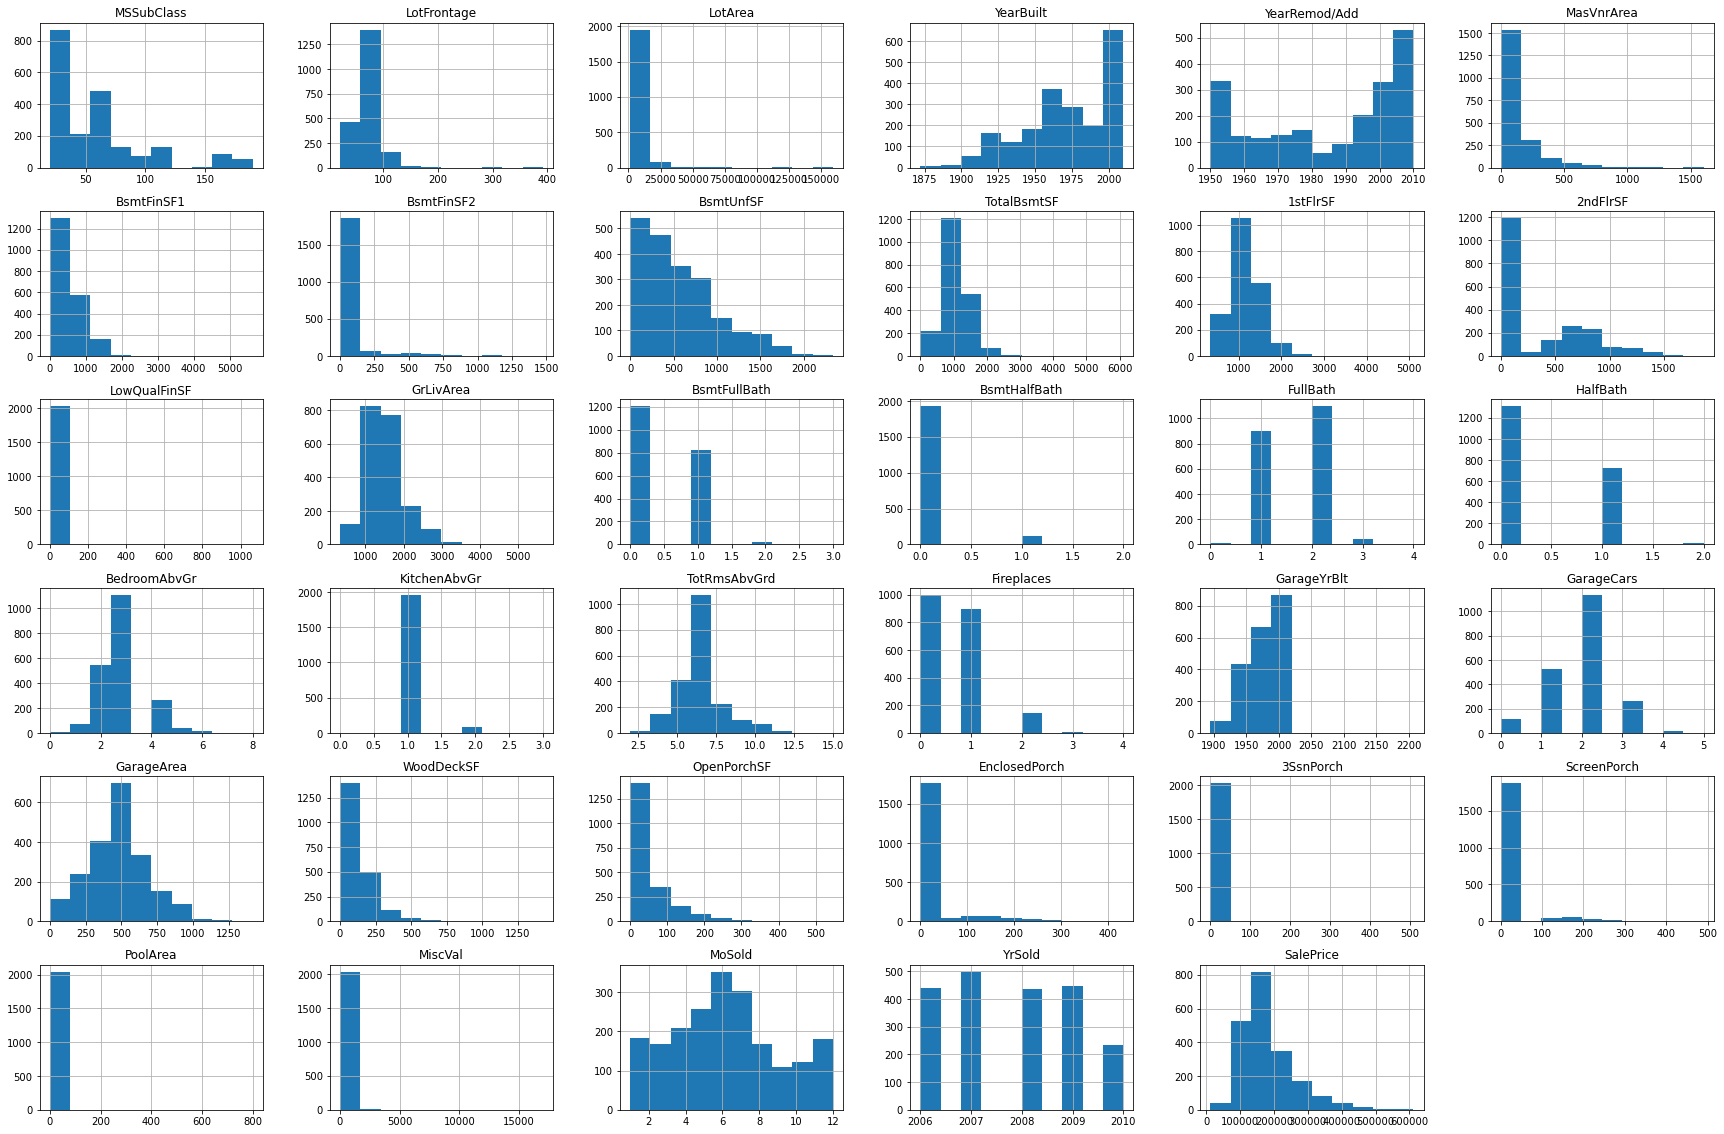

In [39]:
fig = plt.figure(figsize = (30,20))
ax = fig.gca()
df_nocat.hist(ax = ax) #Shows that there is a skewness in some data for e.g. SalePrice & BmstUniSF, 
                       #and that datas like YearBuilt and YearSold need to be transfrom to age 
                       

The aforementioned is supported by the histogram plot

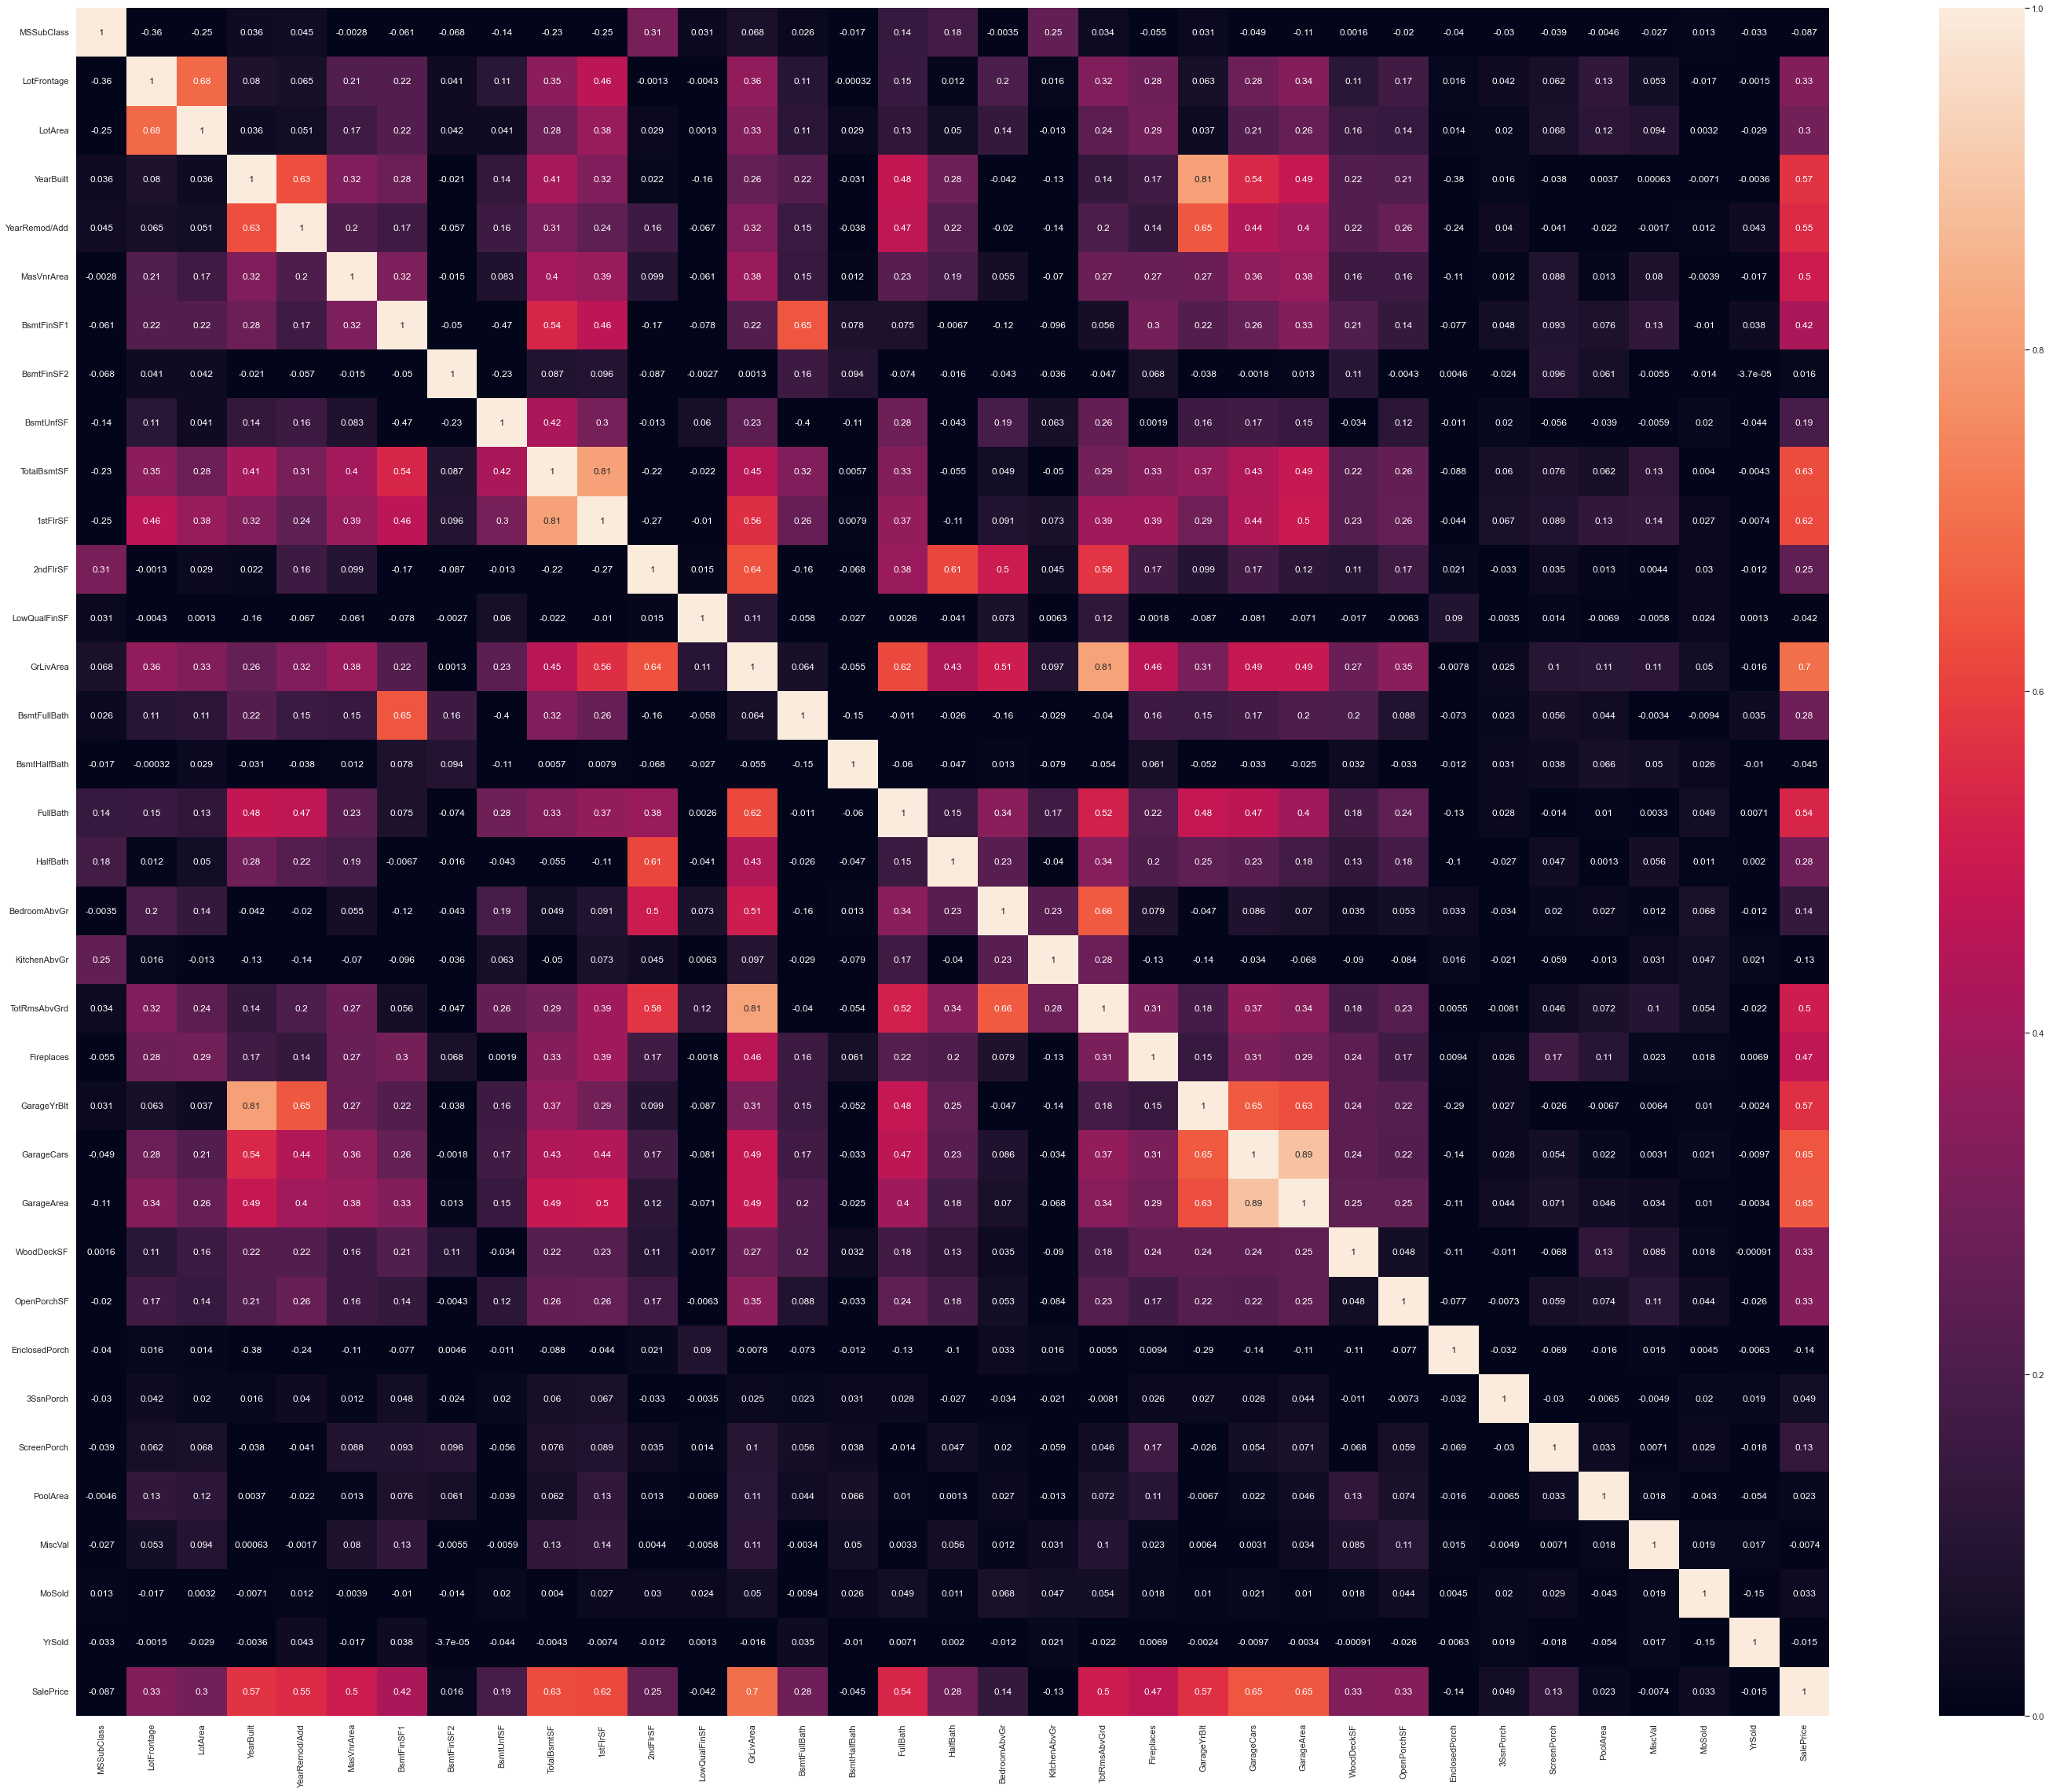

In [40]:
#heatmap
#correlation between discrete data and non-categorical datas (Pearson)
df_nocat_corr = df_nocat.corr(method = 'pearson')
sns.set(rc = {'figure.figsize':(50,40)})
x = sns.heatmap(df_nocat_corr, annot = True, vmin=0, vmax=1)
plt.show()

In [41]:
#correlation between discrete data and non-categorical datas (Pearson) (weakly correlated)

df_nocat_corr_weak = df_nocat_corr[df_nocat_corr < 0.3]
df_nocat_corr_weak = df_nocat_corr_weak.transpose()
df_nocat_corr_weak = df_nocat_corr_weak['SalePrice']
df_nocat_corr_weak = df_nocat_corr_weak.dropna()
df_nocat_corr_weak

MSSubClass      -0.087335
LotArea          0.296566
BsmtFinSF2       0.016432
BsmtUnfSF        0.190211
2ndFlrSF         0.248452
LowQualFinSF    -0.041594
BsmtFullBath     0.283332
BsmtHalfBath    -0.045290
HalfBath         0.283001
BedroomAbvGr     0.137067
KitchenAbvGr    -0.125444
EnclosedPorch   -0.135656
3SsnPorch        0.048732
ScreenPorch      0.134581
PoolArea         0.023106
MiscVal         -0.007375
MoSold           0.032735
YrSold          -0.015203
Name: SalePrice, dtype: float64

In [42]:
#correlation between discrete data and non-categorical datas (Pearson) (acceptably correlated)

df_nocat_corr_strong = df_nocat_corr[df_nocat_corr > 0.3]
df_nocat_corr_strong = df_nocat_corr_strong.transpose()
df_nocat_corr_strong = df_nocat_corr_strong['SalePrice']
df_nocat_corr_strong = df_nocat_corr_strong.dropna()
df_nocat_corr_strong

LotFrontage      0.330955
YearBuilt        0.571849
YearRemod/Add    0.550370
MasVnrArea       0.503579
BsmtFinSF1       0.423433
TotalBsmtSF      0.628849
1stFlrSF         0.618486
GrLivArea        0.697038
FullBath         0.537969
TotRmsAbvGrd     0.504014
Fireplaces       0.471093
GarageYrBlt      0.565713
GarageCars       0.648225
GarageArea       0.650301
WoodDeckSF       0.326490
OpenPorchSF      0.333476
SalePrice        1.000000
Name: SalePrice, dtype: float64

In [43]:
#Numeric datas that are weakly-correlated and skewed (drop or consider for feature engineering)

df_nocat_drop_orfe = pd.concat ([df_nocat_corr_weak, df_nocat_skew], axis =1 )
df_nocat_drop_orfe = df_nocat_drop_orfe.dropna()
df_nocat_drop_orfe.columns = ['Correlation', 'Skewness']
df_nocat_drop_orfe

,Correlation,Skewness
MSSubClass,-0.087335,1.381004
LotArea,0.296566,9.204950
BsmtFinSF2,0.016432,4.241139
LowQualFinSF,-0.041594,11.501289
BsmtHalfBath,-0.045290,3.949272
KitchenAbvGr,-0.125444,4.348274
EnclosedPorch,-0.135656,2.864913
3SsnPorch,0.048732,11.827201
ScreenPorch,0.134581,3.859110
PoolArea,0.023106,16.700228


the listed features are both skewed and weakly correlated to SalePrice (Target) - to considerate to drop or to feature engineer

In [44]:
df_nocat_fix = pd.concat ([df_nocat_corr_strong, df_nocat_skew], axis =1 )
df_nocat_fix = df_nocat_fix.dropna()
df_nocat_fix.columns = ['Correlation', 'Skewness']
df_nocat_fix

,Correlation,Skewness
LotFrontage,0.330955,3.048445
MasVnrArea,0.503579,2.611762
BsmtFinSF1,0.423433,1.603663
TotalBsmtSF,0.628849,1.389592
1stFlrSF,0.618486,1.635146
GrLivArea,0.697038,1.281492
WoodDeckSF,0.326490,2.017081
OpenPorchSF,0.333476,2.298022
SalePrice,1.000000,1.557551


the listed features are both skewed but at least moderately correlated to SalePrice (Target) - to fix and to considerate for feature engineering

In [45]:
#Working with ordinal categorical variable

df_allcat_or.shape

(2051, 14)

In [46]:
df_allcat_or.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ExterQual     2051 non-null   int64  
 1   ExterCond     2051 non-null   int64  
 2   HeatingQC     2051 non-null   int64  
 3   KitchenQual   2051 non-null   int64  
 4   PoolQC        9 non-null      float64
 5   SalePrice     2051 non-null   int64  
 6   FireplaceQu   2051 non-null   int64  
 7   BsmtExposure  2051 non-null   int64  
 8   Bsmt_Cond     2051 non-null   int64  
 9   Bsmt_Qual     2051 non-null   int64  
 10  GarageCond    2051 non-null   int64  
 11  GarageQual    2051 non-null   int64  
 12  OverallQual   2051 non-null   int64  
 13  OverallCond   2051 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 224.5 KB


In [47]:
df_allcat_or.describe(include = "all")

,ExterQual,ExterCond,HeatingQC,KitchenQual,PoolQC,SalePrice,FireplaceQu,BsmtExposure,Bsmt_Cond,Bsmt_Qual,GarageCond,GarageQual,OverallQual,OverallCond
count,2051.000000,2051.000000,2051.000000,2051.000000,9.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1.406143,2.085812,3.158459,1.517309,1.444444,181469.701609,3.226231,0.685519,3.009751,3.597270,2.977084,2.969771,6.112140,5.562165
std,0.587962,0.372792,0.964112,0.665577,1.013794,79258.659352,0.594704,1.044418,0.301059,0.693997,0.218557,0.240047,1.426271,1.104497
min,0.000000,0.000000,0.000000,0.000000,0.000000,12789.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,2.000000,2.000000,1.000000,1.000000,129825.000000,3.000000,0.000000,3.000000,3.000000,3.000000,3.000000,5.000000,5.000000
50%,1.000000,2.000000,4.000000,1.000000,2.000000,162500.000000,3.000000,0.000000,3.000000,4.000000,3.000000,3.000000,6.000000,5.000000
75%,2.000000,2.000000,4.000000,2.000000,2.000000,214000.000000,4.000000,1.000000,3.000000,4.000000,3.000000,3.000000,7.000000,6.000000
max,3.000000,4.000000,4.000000,3.000000,3.000000,611657.000000,5.000000,3.000000,5.000000,5.000000,5.000000,5.000000,10.000000,9.000000


In [48]:
df_allcat_or_skew = df_allcat_or.skew()
df_allcat_or_skew  = df_allcat_or_skew[df_allcat_or_skew > 1]
df_allcat_or_skew1  = df_allcat_or_skew[df_allcat_or_skew < -1] #none
df_allcat_or_skew

ExterCond       1.238045
SalePrice       1.557551
BsmtExposure    1.177124
dtype: float64

## Spearman Correlation (Norminal Categorical Data)

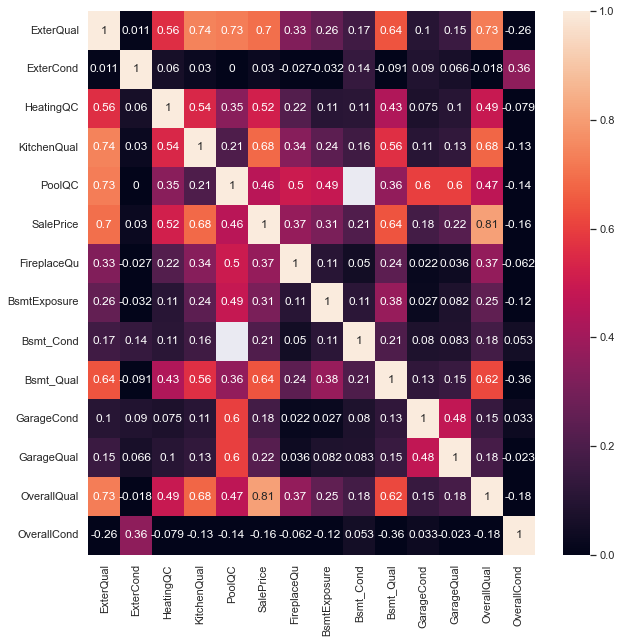

In [49]:
### 1 way Annova for Correlation (Norminal Categorical Data)correlation between ordinal categorical variable and discrete variable
df_allcat_or_corr = df_allcat_or.corr(method='spearman') 
sns.set(rc = {'figure.figsize':(10,10)})
x = sns.heatmap(df_allcat_or_corr, annot = True, vmin=0, vmax=1)
plt.show()

In [50]:
#correlation between ordinal categorical variable and discrete variable (weakly correlated) (drop or consider for feature engineer)

df_allcat_or_corr_weak = df_allcat_or_corr[df_allcat_or_corr < 0.3]
df_allcat_or_corr_weak = df_allcat_or_corr_weak.transpose()
df_allcat_or_corr_weak = df_allcat_or_corr_weak['SalePrice']
df_allcat_or_corr_weak = df_allcat_or_corr_weak.dropna()
df_allcat_or_corr_weak

ExterCond      0.030147
Bsmt_Cond      0.208792
GarageCond     0.178436
GarageQual     0.222955
OverallCond   -0.160501
Name: SalePrice, dtype: float64

In [51]:
#correlation between ordinal categorical variable and discrete variable (acceptably correlated)

df_allcat_or_corr_strong = df_allcat_or_corr[df_allcat_or_corr > 0.3]
df_allcat_or_corr_strong = df_allcat_or_corr_strong.transpose()
df_allcat_or_corr_strong = df_allcat_or_corr_strong['SalePrice']
df_allcat_or_corr_strong = df_allcat_or_corr_strong.dropna()
df_allcat_or_corr_strong

ExterQual       0.696716
HeatingQC       0.518756
KitchenQual     0.684480
PoolQC          0.456773
SalePrice       1.000000
FireplaceQu     0.373786
BsmtExposure    0.310946
Bsmt_Qual       0.642600
OverallQual     0.806923
Name: SalePrice, dtype: float64

In [52]:
#Oridinal data that are weakly-correlated and skewed (drop or consider for feature engineering)

df_allcat_or_drop_orfe = pd.concat ([df_allcat_or_corr_weak, df_allcat_or_skew], axis =1 )
df_allcat_or_drop_orfe = df_allcat_or_drop_orfe.dropna()
df_allcat_or_drop_orfe.columns = ['Correlation', 'Skewness']
df_allcat_or_drop_orfe

,Correlation,Skewness
ExterCond,0.030147,1.238045


the listed features are both skewed and weakly correlated to SalePrice (Target) - to considerate to drop or to feature engineer

In [53]:
#Oridinal datas that are acceptably-correlated and skewed (features to fix for skewness)

df_allcat_or_fix = pd.concat ([df_allcat_or_corr_strong, df_allcat_or_skew], axis =1 )
df_allcat_or_fix = df_allcat_or_fix.dropna()
df_allcat_or_fix.columns = ['Correlation', 'Skewness']
df_allcat_or_fix

,Correlation,Skewness
SalePrice,1.000000,1.557551
BsmtExposure,0.310946,1.177124


the listed features are both skewed but at least moderately correlated to SalePrice (Target) - to fix and to considerate for feature engineering

## 1 way Annova for Correlation (Norminal Categorical Data)

In [54]:
## Exploring Distribution of Data#correlation between Norminal categorical variable and discrete variable (1 way annova)
print(df_allcat_nor1.columns.tolist())

model = ols('SalePrice ~ MSZoning', data=df_allcat_nor1).fit()
ann_MSZoning = sm.stats.anova_lm(model, typ=2)
ann_MSZoning = ann_MSZoning["PR(>F)"]
ann_MSZoning = ann_MSZoning.drop(["Residual"], axis = 0)

model = ols('SalePrice ~ Street', data=df_allcat_nor1).fit()
ann_Street = sm.stats.anova_lm(model, typ=2)
ann_Street = ann_Street["PR(>F)"]
ann_Street = ann_Street.drop(["Residual"], axis = 0)

model = ols('SalePrice ~ Alley', data=df_allcat_nor1).fit()
ann_Alley = sm.stats.anova_lm(model, typ=2)
ann_Alley = ann_Alley["PR(>F)"]
ann_Alley = ann_Alley.drop(["Residual"], axis = 0)

model = ols('SalePrice ~ LotShape', data=df_allcat_nor1).fit()
ann_LotShape = sm.stats.anova_lm(model, typ=2)
ann_LotShape = ann_LotShape["PR(>F)"]
ann_LotShape = ann_LotShape.drop(["Residual"], axis = 0)

model = ols('SalePrice ~ LandContour', data=df_allcat_nor1).fit()
ann_LandContour = sm.stats.anova_lm(model, typ=2)
ann_LandContour = ann_LandContour["PR(>F)"]
ann_LandContour = ann_LandContour.drop(["Residual"], axis = 0)


model = ols('SalePrice ~ Utilities', data=df_allcat_nor1).fit()
ann_Utilities = sm.stats.anova_lm(model, typ=2)
ann_Utilities = ann_Utilities["PR(>F)"]
ann_Utilities = ann_Utilities.drop(["Residual"], axis = 0)


model = ols('SalePrice ~ LotConfig', data=df_allcat_nor1).fit()
ann_LotConfig = sm.stats.anova_lm(model, typ=2)
ann_LotConfig = ann_LotConfig["PR(>F)"]
ann_LotConfig = ann_LotConfig.drop(["Residual"], axis = 0)


model = ols('SalePrice ~ LandSlope', data=df_allcat_nor1).fit()
ann_LandSlope = sm.stats.anova_lm(model, typ=2)
ann_LandSlope = ann_LandSlope["PR(>F)"]
ann_LandSlope = ann_LandSlope.drop(["Residual"], axis = 0)


model = ols('SalePrice ~ Neighborhood', data=df_allcat_nor1).fit()
ann_Neighborhood = sm.stats.anova_lm(model, typ=2)
ann_Neighborhood = ann_Neighborhood["PR(>F)"]
ann_Neighborhood = ann_Neighborhood.drop(["Residual"], axis = 0)


model = ols('SalePrice ~ Condition1', data=df_allcat_nor1).fit()
ann_Condition1 = sm.stats.anova_lm(model, typ=2)
ann_Condition1 = ann_Condition1["PR(>F)"]
ann_Condition1 = ann_Condition1.drop(["Residual"], axis = 0)


model = ols('SalePrice ~ Condition2', data=df_allcat_nor1).fit()
ann_Condition2 = sm.stats.anova_lm(model, typ=2)
ann_Condition2 = ann_Condition2["PR(>F)"]
ann_Condition2 = ann_Condition2.drop(["Residual"], axis = 0)


model = ols('SalePrice ~ BldgType', data=df_allcat_nor1).fit()
ann_BldgType = sm.stats.anova_lm(model, typ=2)
ann_BldgType = ann_BldgType["PR(>F)"]
ann_BldgType = ann_BldgType.drop(["Residual"], axis = 0)


model = ols('SalePrice ~ HouseStyle', data=df_allcat_nor1).fit()
ann_HouseStyle = sm.stats.anova_lm(model, typ=2)
ann_HouseStyle = ann_HouseStyle["PR(>F)"]
ann_HouseStyle = ann_HouseStyle.drop(["Residual"], axis = 0)


model = ols('SalePrice ~ RoofStyle', data=df_allcat_nor1).fit()
ann_RoofStyle = sm.stats.anova_lm(model, typ=2)
ann_RoofStyle = ann_RoofStyle["PR(>F)"]
ann_RoofStyle = ann_RoofStyle.drop(["Residual"], axis = 0)



model = ols('SalePrice ~ RoofMatl', data=df_allcat_nor1).fit()
ann_RoofMatl = sm.stats.anova_lm(model, typ=2)
ann_RoofMatl = ann_RoofMatl["PR(>F)"]
ann_RoofMatl = ann_RoofMatl.drop(["Residual"], axis = 0)



model = ols('SalePrice ~ Exterior1st', data=df_allcat_nor1).fit()
ann_Exterior1st = sm.stats.anova_lm(model, typ=2)
ann_Exterior1st = ann_Exterior1st["PR(>F)"]
ann_Exterior1st = ann_Exterior1st.drop(["Residual"], axis = 0)



model = ols('SalePrice ~ Mas_Vnr_Type', data=df_allcat_nor1).fit()
ann_Mas_Vnr_Type = sm.stats.anova_lm(model, typ=2)
ann_Mas_Vnr_Type = ann_Mas_Vnr_Type["PR(>F)"]
ann_Mas_Vnr_Type = ann_Mas_Vnr_Type.drop(["Residual"], axis = 0)



model = ols('SalePrice ~ Foundation', data=df_allcat_nor1).fit()
ann_Foundation = sm.stats.anova_lm(model, typ=2)
ann_Foundation = ann_Foundation["PR(>F)"]
ann_Foundation = ann_Foundation.drop(["Residual"], axis = 0)


model = ols('SalePrice ~ Heating', data=df_allcat_nor1).fit()
ann_Heating = sm.stats.anova_lm(model, typ=2)
ann_Heating = ann_Heating["PR(>F)"]
ann_Heating = ann_Heating.drop(["Residual"], axis = 0)



model = ols('SalePrice ~ CentralAir', data=df_allcat_nor1).fit()
ann_CentralAir = sm.stats.anova_lm(model, typ=2)
ann_CentralAir = ann_CentralAir["PR(>F)"]
ann_CentralAir = ann_CentralAir.drop(["Residual"], axis = 0)



model = ols('SalePrice ~ Electrical', data=df_allcat_nor1).fit()
ann_Electrical = sm.stats.anova_lm(model, typ=2)
ann_Electrical = ann_Electrical["PR(>F)"]
ann_Electrical = ann_Electrical.drop(["Residual"], axis = 0)



model = ols('SalePrice ~ Functional', data=df_allcat_nor1).fit()
ann_Functional = sm.stats.anova_lm(model, typ=2)
ann_Functional = ann_Functional["PR(>F)"]
ann_Functional = ann_Functional.drop(["Residual"], axis = 0)



model = ols('SalePrice ~ GarageType', data=df_allcat_nor1).fit()
ann_GarageType = sm.stats.anova_lm(model, typ=2)
ann_GarageType = ann_GarageType["PR(>F)"]
ann_GarageType = ann_GarageType.drop(["Residual"], axis = 0)


model = ols('SalePrice ~ GarageFinish', data=df_allcat_nor1).fit()
ann_GarageFinish = sm.stats.anova_lm(model, typ=2)
ann_GarageFinish = ann_GarageFinish["PR(>F)"]
ann_GarageFinish = ann_GarageFinish.drop(["Residual"], axis = 0)



model = ols('SalePrice ~ PavedDrive', data=df_allcat_nor1).fit()
ann_PavedDrive = sm.stats.anova_lm(model, typ=2)
ann_PavedDrive = ann_PavedDrive["PR(>F)"]
ann_PavedDrive = ann_PavedDrive.drop(["Residual"], axis = 0)


model = ols('SalePrice ~ Fence', data=df_allcat_nor1).fit()
ann_Fence = sm.stats.anova_lm(model, typ=2)
ann_Fence = ann_Fence["PR(>F)"]
ann_Fence = ann_Fence.drop(["Residual"], axis = 0)


model = ols('SalePrice ~ MiscFeature', data=df_allcat_nor1).fit()
ann_MiscFeature = sm.stats.anova_lm(model, typ=2)
ann_MiscFeature = ann_MiscFeature["PR(>F)"]
ann_MiscFeature = ann_MiscFeature.drop(["Residual"], axis = 0)



model = ols('SalePrice ~ SaleType', data=df_allcat_nor1).fit()
ann_SaleType = sm.stats.anova_lm(model, typ=2)
ann_SaleType = ann_SaleType["PR(>F)"]
ann_SaleType = ann_SaleType.drop(["Residual"], axis = 0)


annova_combined = pd.concat([ann_SaleType, ann_MiscFeature, ann_Fence, ann_PavedDrive, ann_GarageFinish,ann_GarageType,
                             ann_Functional, ann_Electrical, ann_CentralAir, ann_Heating,
                             ann_Foundation, ann_Mas_Vnr_Type, ann_Exterior1st, ann_RoofMatl, ann_RoofStyle, ann_HouseStyle, 
                             ann_BldgType, ann_Condition2, ann_Condition1, ann_Neighborhood, ann_LandSlope, ann_LotConfig, ann_Utilities,
                             ann_LandContour, ann_Alley, ann_Street, ann_MSZoning])

annova_combined = pd.DataFrame(annova_combined)
annova_combined.columns = ['Pvalue']

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'Mas_Vnr_Type', 'Foundation', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageType', 'GarageFinish', 'PavedDrive', 'Fence', 'MiscFeature', 'SaleType', 'SalePrice']


H0 = no dif in mean btwn groups
H1 = differs from mean of dependent valuable

if p > 0.05, reject null - categorical variable has no significant influence on the numerical variable
if p < 0.05, do no reject Null - categorical variable has significant influence on the numerical variable

In [55]:
#correlation between Norminal categorical variable and discrete variable (acceptable correaltion)
Annova_rejectnull_good = annova_combined[annova_combined < 0.05]
Annova_rejectnull_good = Annova_rejectnull_good.dropna()
Annova_rejectnull_good

,Pvalue
PavedDrive,5.399157e-33
GarageFinish,3.832656e-128
GarageType,8.846975e-75
Functional,3.924107e-08
Electrical,4.183977e-29
CentralAir,1.511309e-37
Heating,3.550218e-06
Foundation,2.255492e-05
Mas_Vnr_Type,2.385441e-11
Exterior1st,6.386721e-07


listed variables have P value < 5, therefore do not reject null value - categorical variable has significant influence on the numerical variable

In [56]:
#correlation between Norminal categorical variable and discrete variable (weak correlation - drop or consider for feature engineering)
Annova_donotreject_bad = annova_combined[annova_combined.Pvalue > 0.05] 
Annova_donotreject_bad

,Pvalue
SaleType,0.061091
MiscFeature,0.785425
Fence,0.854868
Condition2,0.673980
Utilities,0.099694


listed variables have P value > 5, therefore reject null value - categorical variable has no significant influence on the numerical variable. Consider for dropping or for feature engineering

In [57]:
#combining df

df_allcat_nornsp =  df_allcat_nor.drop(columns = ['SalePrice'])
df_nocatnsp = df_nocat.drop(columns = ['SalePrice'])
df_allcat_ornsp = df_allcat_or.drop( columns = ["SalePrice"])
df_combined = pd.concat([df_allcat_nornsp, df_allcat_ornsp, df_nocatnsp], axis = 1)

## Checking for Collinearity

In [58]:
#Checking with Colinearity

def calculate_vif(df, features):    
    vif, tolerance = {}, {}
    # all the features that you want to examine
    for feature in features:
        # extract all the other features you will regress againstmatlibplot
        X = [f for f in features if f != feature]        
        X, y = df[X], df[feature]
        # extract r-squared from the fit
        r2 = LinearRegression().fit(X, y).score(X, y)                
        
        # calculate tolerance
        tolerance[feature] = 1 - r2
        # calculate VIF
        vif[feature] = 1/(tolerance[feature])
    # return VIF DataFrame
    return pd.DataFrame({'VIF': vif, 'Tolerance': tolerance})

df_vif = calculate_vif(df=df_combined, features=[ 'LotFrontage',                                              
                                                  'MasVnrArea',
                                                  'BsmtFinSF1', 
                                                  'TotalBsmtSF',
                                                  '1stFlrSF',
                                                  'GrLivArea',
                                                  'BsmtFullBath', 
                                                  'FullBath',
                                                  'HalfBath',
                                                  'TotRmsAbvGrd',
                                                  'Fireplaces',
                                                  'GarageCars',
                                                  'GarageArea',
                                                  'WoodDeckSF',
                                                  'OpenPorchSF',
                                                  'ExterQual',                                              
                                                  'HeatingQC',
                                                  'KitchenQual',                                                                                           
                                                  'FireplaceQu',
                                                  'BsmtExposure', 
                                                  'Bsmt_Qual',
                                                  'OverallQual'])

df_vif 

,VIF,Tolerance
LotFrontage,1.432022,0.698313
MasVnrArea,1.403849,0.712327
BsmtFinSF1,2.405771,0.415667
TotalBsmtSF,3.782839,0.264352
1stFlrSF,4.520374,0.221221
GrLivArea,6.379796,0.156745
BsmtFullBath,1.790354,0.558549
FullBath,2.182803,0.458126
HalfBath,1.882476,0.531215
TotRmsAbvGrd,3.281236,0.304763


Skew data has VIF > 5. High Colinearity variables = GrLivArea, GarageCars, GarageArea. onsider feature engineering GrLive area, garage car area, 3SsnPorch, ScreenPorch, PoolArea

In [59]:
df_to_drop = pd.concat([df_nocat_drop_orfe, Annova_donotreject_bad, df_allcat_or_corr_weak], axis = 1)
df_to_drop

,Correlation,Skewness,Pvalue,SalePrice
MSSubClass,-0.087335,1.381004,NaN,NaN
LotArea,0.296566,9.204950,NaN,NaN
BsmtFinSF2,0.016432,4.241139,NaN,NaN
LowQualFinSF,-0.041594,11.501289,NaN,NaN
BsmtHalfBath,-0.045290,3.949272,NaN,NaN
KitchenAbvGr,-0.125444,4.348274,NaN,NaN
EnclosedPorch,-0.135656,2.864913,NaN,NaN
3SsnPorch,0.048732,11.827201,NaN,NaN
ScreenPorch,0.134581,3.859110,NaN,NaN
PoolArea,0.023106,16.700228,NaN,NaN


Listed variables are variables that are wekaly correlated and skewed, they will be considered for dropping or feature engineering

# Feature Engineering

In [60]:
#Numeric datas to transfrom to age: YearRemodAdd YearBuilt GarageYrBlt YrSold
def AgeYears(feature): 
    return feature.apply(lambda x: 2022 - x)

df_nocat.rename(columns={'YearRemod/Add':'YearRemodAdd'}, inplace=True)

df_nocat.YearBuilt = AgeYears(df_nocat.YearBuilt)
df_nocat.GarageYrBlt = AgeYears(df_nocat.GarageYrBlt)
df_nocat.YrSold = AgeYears(df_nocat.YrSold)
df_nocat.YearRemodAdd = AgeYears(df_nocat.YearRemodAdd)

## Feature Engineering (TotallivingPremiseSF)

In [61]:
df_combined['TotallivingPremiseSF'] = (df_combined['GrLivArea'] + df_combined['OpenPorchSF'] + df_combined['EnclosedPorch'] + df_combined['3SsnPorch'] + df_combined['ScreenPorch']  + df_combined['PoolArea'] + df_combined['WoodDeckSF']) 
df_combined['TotallivingPremiseSF']

0       1523
1       2196
2       1109
3       1544
4       1504
        ... 
2046    2004
2047    1019
2048    1913
2049    1529
2050    2004
Name: TotallivingPremiseSF, Length: 2051, dtype: int64

TotallivingPremisesf is the combined square foot of all living presmises in the property

                                                                 Outliers: 2


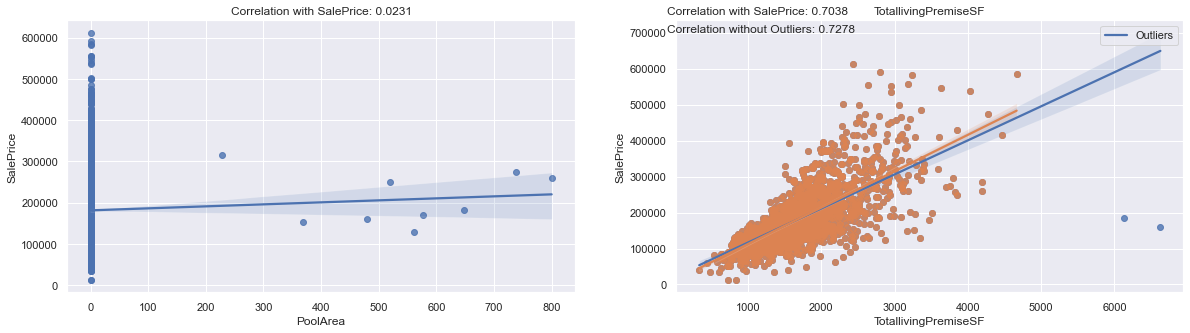

In [62]:
#plotting correlation increase
df_plot = pd.concat([df_combined[['TotallivingPremiseSF', 'PoolArea', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch']], df_sp], axis = 1)

fig = plt.figure(figsize=(20,5))
fig1 = fig.add_subplot(121); sns.regplot(x='PoolArea', y='SalePrice', data=df_plot)
plt.title('Correlation with SalePrice: {:6.4f}'.format(df_plot.PoolArea.corr(df_plot['SalePrice'])))

fig2 = fig.add_subplot(122); sns.regplot(x='TotallivingPremiseSF', y='SalePrice', data=df_plot); plt.legend(['Outliers'])
plt.text(x=-100, y=750000, s='Correlation with SalePrice: {:6.4f}'.format(df_plot.TotallivingPremiseSF.corr(df_plot['SalePrice'])))
print('                                                                 Outliers:',(df_plot.TotallivingPremiseSF>6000).sum())
df = df_plot.loc[df_plot.TotallivingPremiseSF<6000]
sns.regplot(x='TotallivingPremiseSF', y='SalePrice', data=df); plt.title('TotallivingPremiseSF')
plt.text(x=-100, y=700000, s='Correlation without Outliers: {:6.4f}'.format(df.TotallivingPremiseSF.corr(df_plot['SalePrice'])))
plt.show()
del df

                                                                 Outliers: 2


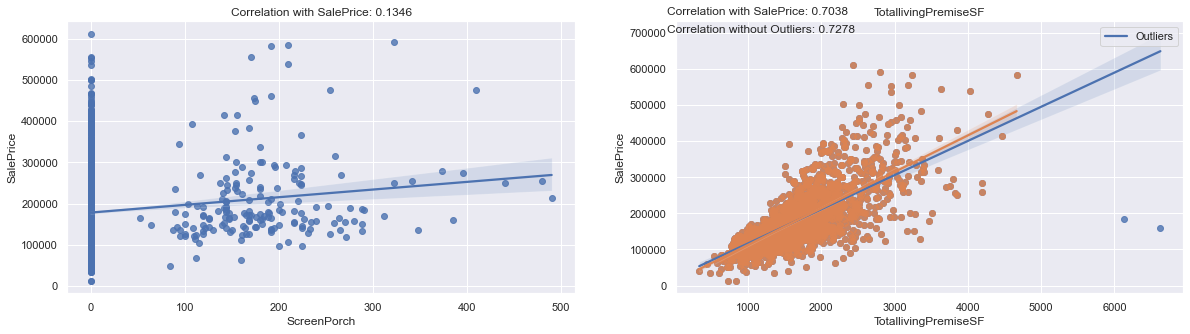

In [63]:
#plotting correlation increase
fig = plt.figure(figsize=(20,5))
fig1 = fig.add_subplot(121); sns.regplot(x='ScreenPorch', y='SalePrice', data=df_plot)
plt.title('Correlation with SalePrice: {:6.4f}'.format(df_plot.ScreenPorch.corr(df_plot['SalePrice'])))

fig2 = fig.add_subplot(122); sns.regplot(x='TotallivingPremiseSF', y='SalePrice', data=df_plot); plt.legend(['Outliers'])
plt.text(x=-100, y=750000, s='Correlation with SalePrice: {:6.4f}'.format(df_plot.TotallivingPremiseSF.corr(df_plot['SalePrice'])))
print('                                                                 Outliers:',(df_plot.TotallivingPremiseSF>6000).sum())
df = df_plot.loc[df_plot.TotallivingPremiseSF<6000]
sns.regplot(x='TotallivingPremiseSF', y='SalePrice', data=df); plt.title('TotallivingPremiseSF')
plt.text(x=-100, y=700000, s='Correlation without Outliers: {:6.4f}'.format(df.TotallivingPremiseSF.corr(df_plot['SalePrice'])))
plt.show()
del df

                                                                 Outliers: 2


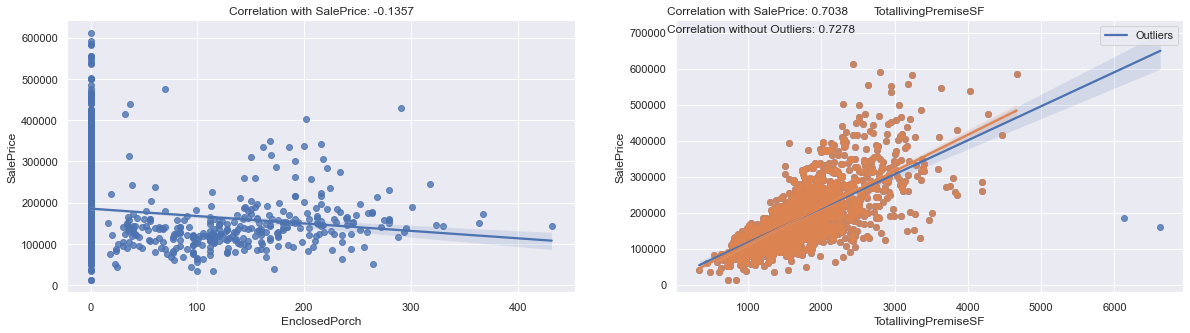

In [64]:
#plotting correlation increase
fig = plt.figure(figsize=(20,5))
fig1 = fig.add_subplot(121); sns.regplot(x='EnclosedPorch', y='SalePrice', data=df_plot)
plt.title('Correlation with SalePrice: {:6.4f}'.format(df_plot.EnclosedPorch.corr(df_plot['SalePrice'])))

fig2 = fig.add_subplot(122); sns.regplot(x='TotallivingPremiseSF', y='SalePrice', data=df_plot); plt.legend(['Outliers'])
plt.text(x=-100, y=750000, s='Correlation with SalePrice: {:6.4f}'.format(df_plot.TotallivingPremiseSF.corr(df_plot['SalePrice'])))
print('                                                                 Outliers:',(df_plot.TotallivingPremiseSF>6000).sum())
df = df_plot.loc[df_plot.TotallivingPremiseSF<6000]
sns.regplot(x='TotallivingPremiseSF', y='SalePrice', data=df); plt.title('TotallivingPremiseSF')
plt.text(x=-100, y=700000, s='Correlation without Outliers: {:6.4f}'.format(df.TotallivingPremiseSF.corr(df_plot['SalePrice'])))
plt.show()
del df

                                                                 Outliers: 2


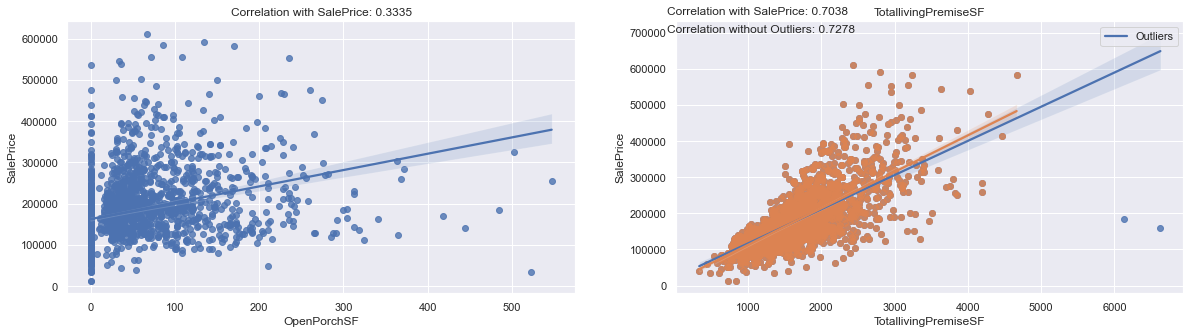

In [65]:
#plotting correlation increase
fig = plt.figure(figsize=(20,5))
fig1 = fig.add_subplot(121); sns.regplot(x='OpenPorchSF', y='SalePrice', data=df_plot)
plt.title('Correlation with SalePrice: {:6.4f}'.format(df_plot.OpenPorchSF.corr(df_plot['SalePrice'])))

fig2 = fig.add_subplot(122); sns.regplot(x='TotallivingPremiseSF', y='SalePrice', data=df_plot); plt.legend(['Outliers'])
plt.text(x=-100, y=750000, s='Correlation with SalePrice: {:6.4f}'.format(df_plot.TotallivingPremiseSF.corr(df_plot['SalePrice'])))
print('                                                                 Outliers:',(df_plot.TotallivingPremiseSF>6000).sum())
df = df_plot.loc[df_plot.TotallivingPremiseSF<6000]
sns.regplot(x='TotallivingPremiseSF', y='SalePrice', data=df); plt.title('TotallivingPremiseSF')
plt.text(x=-100, y=700000, s='Correlation without Outliers: {:6.4f}'.format(df.TotallivingPremiseSF.corr(df_plot['SalePrice'])))
plt.show()
del df

## Feature Engineering (Bsmtstandard)

In [66]:
df_combined['Bsmtstandard'] = df_combined['TotalBsmtSF'] * (df_combined['Bsmt_Qual']**2 + df_combined['Bsmt_Cond'] + df_combined['BsmtExposure']*2) #remove bsmt qual
df_combined['Bsmtstandard']

0        8700.0
1       17347.0
2       12684.0
3        7296.0
4        5408.0
         ...   
2046    43332.0
2047    10332.0
2048    10752.0
2049    14400.0
2050    11928.0
Name: Bsmtstandard, Length: 2051, dtype: float64

Bsmtstandard are points given to bsmt on the basis of their quality, condition, and exposure level

                                                                 Outliers: 2


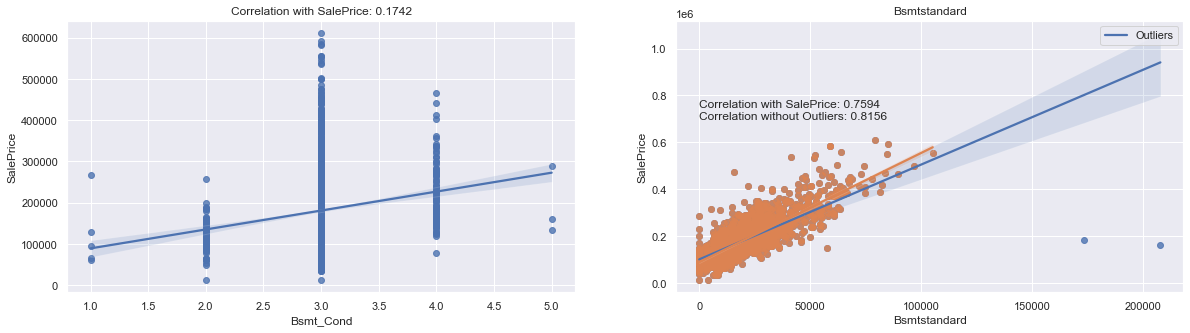

In [67]:
#plotting correlation increase
df_plot = pd.concat([df_combined[['TotalBsmtSF', 'Bsmt_Qual','Bsmt_Cond', 'BsmtExposure', 'Bsmtstandard']], df_sp], axis = 1)

fig = plt.figure(figsize=(20,5))
fig1 = fig.add_subplot(121); sns.regplot(x='Bsmt_Cond', y='SalePrice', data=df_plot)
plt.title('Correlation with SalePrice: {:6.4f}'.format(df_plot.Bsmt_Cond.corr(df_plot['SalePrice'])))

fig2 = fig.add_subplot(122); sns.regplot(x='Bsmtstandard', y='SalePrice', data=df_plot); plt.legend(['Outliers'])
plt.text(x=-100, y=750000, s='Correlation with SalePrice: {:6.4f}'.format(df_plot.Bsmtstandard.corr(df_plot['SalePrice'])))
print('                                                                 Outliers:',(df_plot.Bsmtstandard>150000).sum())
df = df_plot.loc[df_plot.Bsmtstandard<150000]
sns.regplot(x='Bsmtstandard', y='SalePrice', data=df); plt.title('Bsmtstandard')
plt.text(x=-100, y=700000, s='Correlation without Outliers: {:6.4f}'.format(df.Bsmtstandard.corr(df_plot['SalePrice'])))
plt.show()
del df

                                                                 Outliers: 2


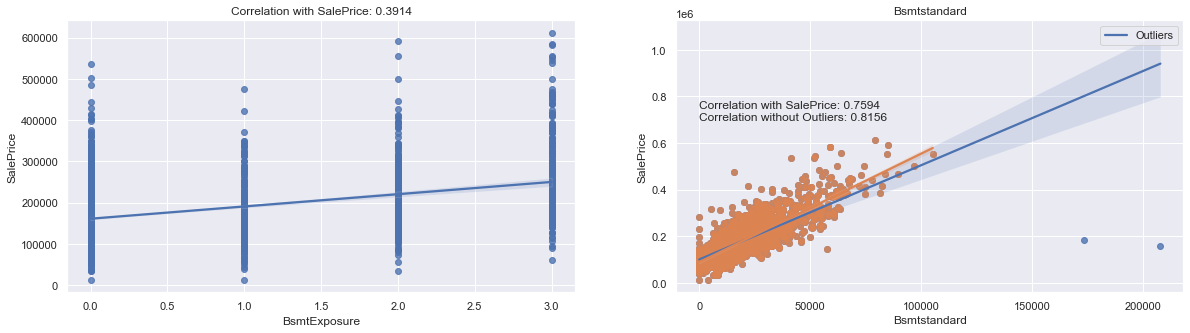

In [68]:
#plotting correlation increase
fig = plt.figure(figsize=(20,5))
fig1 = fig.add_subplot(121); sns.regplot(x='BsmtExposure', y='SalePrice', data=df_plot)
plt.title('Correlation with SalePrice: {:6.4f}'.format(df_plot.BsmtExposure.corr(df_plot['SalePrice'])))

fig2 = fig.add_subplot(122); sns.regplot(x='Bsmtstandard', y='SalePrice', data=df_plot); plt.legend(['Outliers'])
plt.text(x=-100, y=750000, s='Correlation with SalePrice: {:6.4f}'.format(df_plot.Bsmtstandard.corr(df_plot['SalePrice'])))
print('                                                                 Outliers:',(df_plot.Bsmtstandard>150000).sum())
df = df_plot.loc[df_plot.Bsmtstandard<150000]
sns.regplot(x='Bsmtstandard', y='SalePrice', data=df); plt.title('Bsmtstandard')
plt.text(x=-100, y=700000, s='Correlation without Outliers: {:6.4f}'.format(df.Bsmtstandard.corr(df_plot['SalePrice'])))
plt.show()
del df


## Feature Engineering (Bsmttypecondition)

In [69]:
df_combined['Bsmttypecondition'] = df_combined['BsmtFinSF1'] * df_combined['BsmtFinType1']**4  + df_combined['BsmtFinSF2'] * df_combined['BsmtFinType2']**3
df_combined['Bsmttypecondition']

0        690768.0
1        825552.0
2        947376.0
3             0.0
4             0.0
          ...    
2046    1310256.0
2047      67072.0
2048          0.0
2049      13305.0
2050          0.0
Name: Bsmttypecondition, Length: 2051, dtype: float64

Bsmttypecondition is the combined points given to the different type of bsmt (type 1 and 2) on the basis of their size and quality

                                                                 Outliers: 2


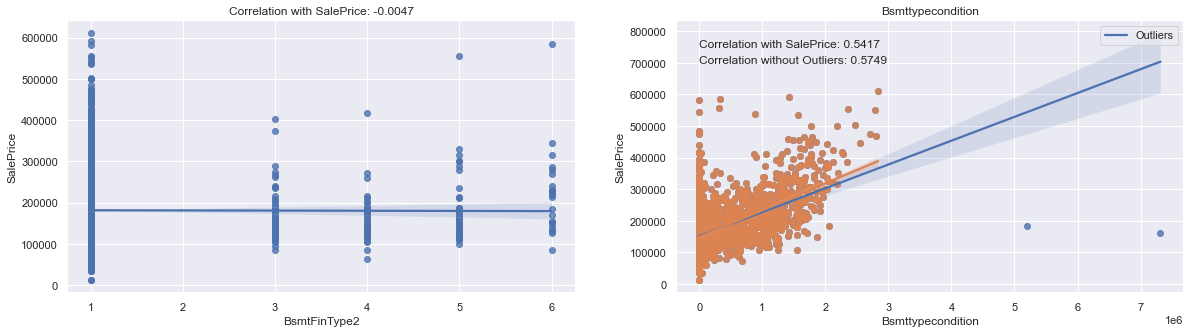

In [70]:
#plotting correlation increase
df_plot = pd.concat([df_combined[['BsmtFinType2', 'Bsmttypecondition']], df_sp], axis = 1)

fig = plt.figure(figsize=(20,5))
fig1 = fig.add_subplot(121); sns.regplot(x='BsmtFinType2', y='SalePrice', data=df_plot)
plt.title('Correlation with SalePrice: {:6.4f}'.format(df_plot.BsmtFinType2.corr(df_plot['SalePrice'])))

fig2 = fig.add_subplot(122); sns.regplot(x='Bsmttypecondition', y='SalePrice', data=df_plot); plt.legend(['Outliers'])
plt.text(x=-100, y=750000, s='Correlation with SalePrice: {:6.4f}'.format(df_plot.Bsmttypecondition.corr(df_plot['SalePrice'])))
print('                                                                 Outliers:',(df_plot.Bsmttypecondition>5000000).sum())
df = df_plot.loc[df_plot.Bsmttypecondition<5000000]
sns.regplot(x='Bsmttypecondition', y='SalePrice', data=df); plt.title('Bsmttypecondition')
plt.text(x=-100, y=700000, s='Correlation without Outliers: {:6.4f}'.format(df.Bsmttypecondition.corr(df_plot['SalePrice'])))
plt.show()
del df

                                                                 Outliers: 2


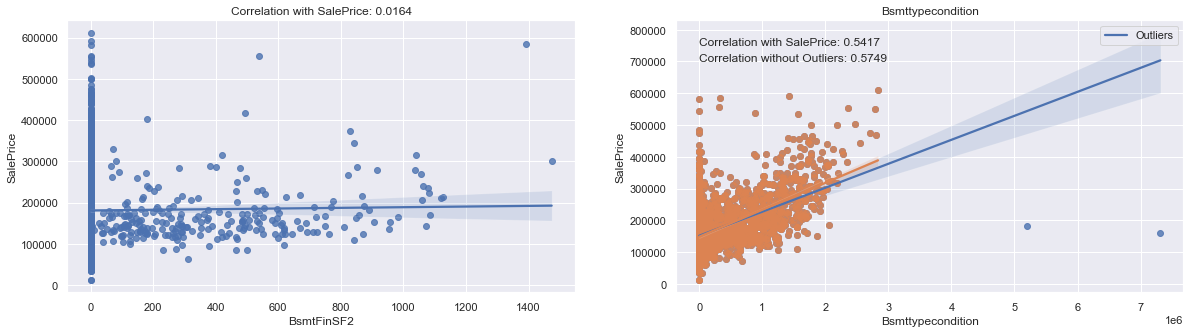

In [71]:
#plotting correlation increase
df_plot = pd.concat([df_combined[['BsmtFinType2', 'Bsmttypecondition', 'BsmtFinSF2']], df_sp], axis = 1)

fig = plt.figure(figsize=(20,5))
fig1 = fig.add_subplot(121); sns.regplot(x='BsmtFinSF2', y='SalePrice', data=df_plot)
plt.title('Correlation with SalePrice: {:6.4f}'.format(df_plot.BsmtFinSF2.corr(df_plot['SalePrice'])))

fig2 = fig.add_subplot(122); sns.regplot(x='Bsmttypecondition', y='SalePrice', data=df_plot); plt.legend(['Outliers'])
plt.text(x=-100, y=750000, s='Correlation with SalePrice: {:6.4f}'.format(df_plot.Bsmttypecondition.corr(df_plot['SalePrice'])))
print('                                                                 Outliers:',(df_plot.Bsmttypecondition>5000000).sum())
df = df_plot.loc[df_plot.Bsmttypecondition<5000000]
sns.regplot(x='Bsmttypecondition', y='SalePrice', data=df); plt.title('Bsmttypecondition')
plt.text(x=-100, y=700000, s='Correlation without Outliers: {:6.4f}'.format(df.Bsmttypecondition.corr(df_plot['SalePrice'])))
plt.show()
del df

## Feature Engineering (Garagestandard)

In [72]:
df_combined['Garagestandard'] = df_combined['GarageArea'] * df_combined['GarageQual']  

                                                                 Outliers: 25


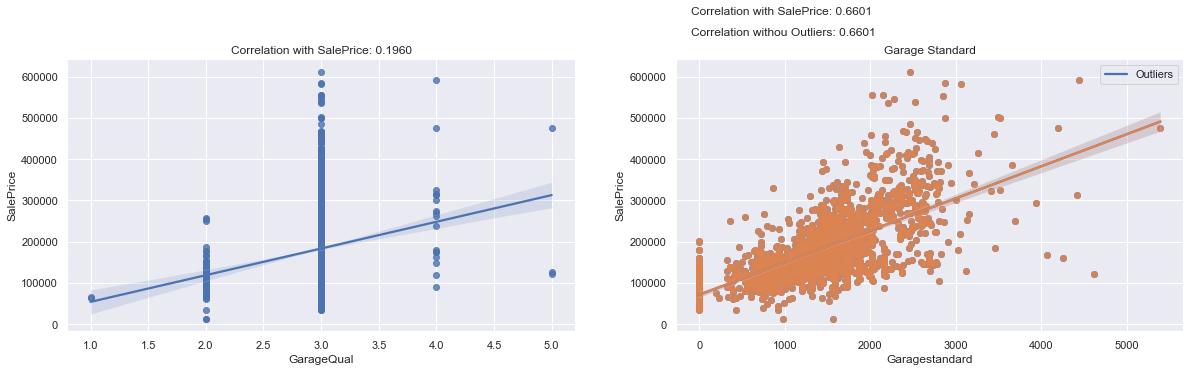

In [73]:
#plotting
df_plot = pd.concat([df_combined[['GarageArea', 'GarageQual','Garagestandard']], df_sp], axis = 1)

fig = plt.figure(figsize=(20,5))
fig1 = fig.add_subplot(121); sns.regplot(x='GarageQual', y='SalePrice', data=df_plot)
plt.title('Correlation with SalePrice: {:6.4f}'.format(df_plot.GarageQual.corr(df_plot['SalePrice'])))

fig2 = fig.add_subplot(122); sns.regplot(x='Garagestandard', y='SalePrice', data=df_plot); plt.legend(['Outliers'])
plt.text(x=-100, y=750000, s='Correlation with SalePrice: {:6.4f}'.format(df_plot.Garagestandard.corr(df_plot['SalePrice'])))
print('                                                                 Outliers:',(df_plot.Garagestandard>3000).sum())
df = df_plot.loc[df_plot.Garagestandard<3000]
sns.regplot(x='Garagestandard', y='SalePrice', data=df_plot); plt.title('Garage Standard')
plt.text(x=-100, y=700000, s='Correlation withou Outliers: {:6.4f}'.format(df_plot.Garagestandard.corr(df_plot['SalePrice'])))
plt.show()
del df

## Fixing Collinearity

In [74]:
calculate_vif(df=df_combined, features=[ 'LotFrontage',                                              
                                          'MasVnrArea',
                                          'BsmtFinSF1', 
                                          'TotalBsmtSF',
                                          '1stFlrSF',
                                          'GrLivArea',
                                          'BsmtFullBath', 
                                          'FullBath',
                                          'HalfBath',
                                          'TotRmsAbvGrd',
                                          'Fireplaces',
                                          'GarageCars',
                                          'GarageArea',
                                          'WoodDeckSF',
                                          'OpenPorchSF',
                                          'ExterQual',                                              
                                          'HeatingQC',
                                          'KitchenQual',                                                                                           
                                          'FireplaceQu',
                                          'BsmtExposure', 
                                          'Bsmt_Qual',
                                          'OverallQual',
                                          'Garagestandard',
                                           'Bsmttypecondition',
                                           'Bsmtstandard',
                                           'TotallivingPremiseSF'])

df_vif 

,VIF,Tolerance
LotFrontage,1.432022,0.698313
MasVnrArea,1.403849,0.712327
BsmtFinSF1,2.405771,0.415667
TotalBsmtSF,3.782839,0.264352
1stFlrSF,4.520374,0.221221
GrLivArea,6.379796,0.156745
BsmtFullBath,1.790354,0.558549
FullBath,2.182803,0.458126
HalfBath,1.882476,0.531215
TotRmsAbvGrd,3.281236,0.304763


In [75]:
df_combined = df_combined.drop( columns = ['PoolQC', 'MSSubClass','LowQualFinSF','BsmtHalfBath',
                                           'MiscVal', 'MiscFeature',
                                           'Fence', 'Condition2', 'Utilities'])


df_combined = df_combined.drop( columns = ['WoodDeckSF','Fireplaces', 'LotFrontage', 'LotArea', 'BsmtFinSF2','BsmtFinType2','BsmtFinType1',
                                           'GrLivArea','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea'
                                           ,'TotalBsmtSF','Bsmt_Cond','GarageQual','GarageArea'])



dropping features with high collinearity to reduce overall collineraity

In [76]:
df_vif = calculate_vif(df=df_combined, features=[ 'Garagestandard',  
                                                  'MasVnrArea',
                                                  'Bsmt_Qual',                                              
                                                  'BsmtFullBath', 
                                                  'FullBath',
                                                  'HalfBath',
                                                  'TotRmsAbvGrd',
                                                  'BsmtExposure',
                                                  'GarageCars',
                                                  'TotallivingPremiseSF',                                                                                                    
                                                  'ExterQual',                                              
                                                  'HeatingQC',
                                                  'KitchenQual',                                                                                           
                                                  'FireplaceQu',
                                                  'Bsmtstandard', 
                                                  'Bsmttypecondition',
                                                  'OverallQual',
                                                 'Bsmtstandard'])

df_vif

,VIF,Tolerance
Garagestandard,4.657112,0.214725
MasVnrArea,1.416765,0.705833
Bsmt_Qual,2.664410,0.375318
BsmtFullBath,1.707471,0.585661
FullBath,2.045476,0.488884
HalfBath,1.529128,0.653967
TotRmsAbvGrd,2.704377,0.369771
BsmtExposure,1.467987,0.681205
GarageCars,4.743737,0.210804
TotallivingPremiseSF,3.954421,0.252882


## ONE-HOT-ENCODING Norminal Values

In [77]:
#ONE-HOT-ENCODING Norminal Values
df_combined = pd.get_dummies(df_combined)
df_combined## Fixing Collinearity

,ExterQual,ExterCond,HeatingQC,KitchenQual,FireplaceQu,BsmtExposure,Bsmt_Qual,GarageCond,OverallQual,OverallCond,...,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,2,2,4,2,3,0,3,3,6,8,...,1,0,0,0,0,0,0,0,0,1
1,2,2,4,2,3,0,4,3,7,5,...,1,0,0,0,0,0,0,0,0,1
2,1,3,2,2,3,0,3,3,5,7,...,1,0,0,0,0,0,0,0,0,1
3,1,2,3,1,3,0,4,3,5,5,...,1,0,0,0,0,0,0,0,0,1
4,1,2,2,1,3,0,2,3,6,8,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,2,2,4,2,4,2,4,3,8,5,...,1,0,0,0,0,0,0,0,0,1
2047,1,2,4,1,3,0,3,3,4,5,...,1,0,0,0,0,0,0,0,0,1
2048,1,2,3,1,3,0,3,2,6,6,...,1,0,0,0,0,0,0,0,0,1
2049,1,2,2,1,4,0,3,3,4,5,...,1,0,0,0,0,0,0,0,0,1


## Fixing skewed but useful variables

In [78]:
df_fix_info = df_nocat_fix 
df_fix_info
df_fix = df_combined[['MasVnrArea','BsmtFinSF1', 'Garagestandard', 'Bsmttypecondition', 'Bsmtstandard', 'TotallivingPremiseSF']]
df_fix

,MasVnrArea,BsmtFinSF1,Garagestandard,Bsmttypecondition,Bsmtstandard,TotallivingPremiseSF
0,289.0,533.0,1425.0,690768.0,8700.0,1523
1,132.0,637.0,1677.0,825552.0,17347.0,2196
2,0.0,731.0,738.0,947376.0,12684.0,1109
3,0.0,0.0,1200.0,0.0,7296.0,1544
4,0.0,0.0,1452.0,0.0,5408.0,1504
...,...,...,...,...,...,...
2046,0.0,1011.0,1560.0,1310256.0,43332.0,2004
2047,0.0,262.0,1617.0,67072.0,10332.0,1019
2048,0.0,0.0,684.0,0.0,10752.0,1913
2049,0.0,155.0,882.0,13305.0,14400.0,1529


listed features are features that are skewed but has at least medium correlation with SalePrice

# Removing Outliners

## Removing Outliners (TotallivingPremiseSF)

1614.0

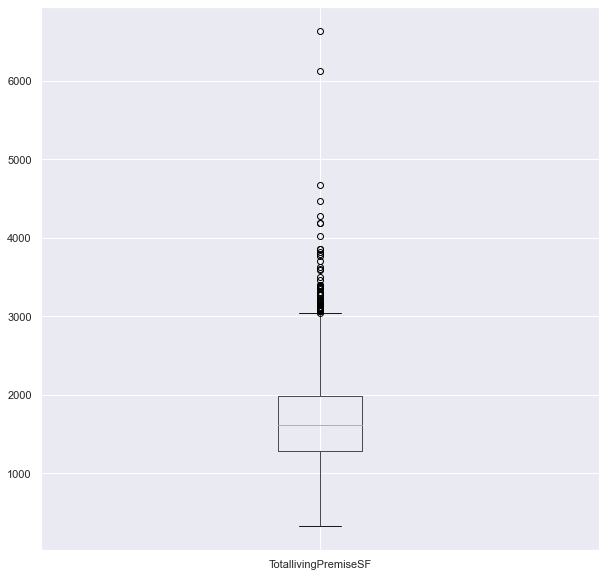

In [79]:
df_fix.boxplot(column ='TotallivingPremiseSF')
df_fix['TotallivingPremiseSF'].median()# Removing Outliners

C:\Users\GETGDN~1\AppData\Local\Temp/ipykernel_6308/1478629563.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fix['TotallivingPremiseSF'] = np.where(df_fix['TotallivingPremiseSF'] > 5000, 1614, df_fix['TotallivingPremiseSF'])


<AxesSubplot:>

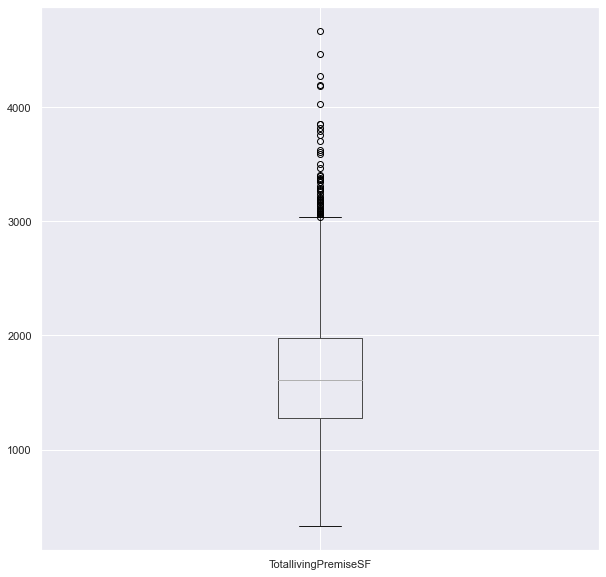

In [80]:
df_fix['TotallivingPremiseSF'] = np.where(df_fix['TotallivingPremiseSF'] > 5000, 1614, df_fix['TotallivingPremiseSF'])
df_fix.boxplot(column ='TotallivingPremiseSF')

## Removing Outliners (MasVnrArea)

0.0

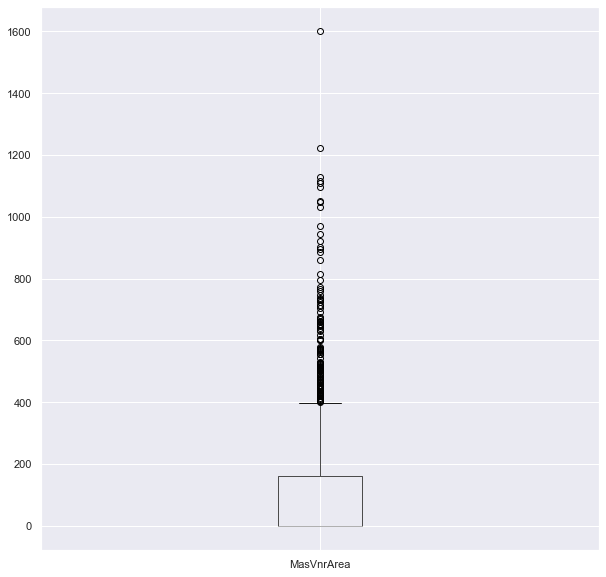

In [81]:
df_fix.boxplot(column ='MasVnrArea')
df_fix['MasVnrArea'].median()

C:\Users\GETGDN~1\AppData\Local\Temp/ipykernel_6308/3044687076.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fix['MasVnrArea'] = np.where(df_fix['MasVnrArea'] > 1400, 0, df_fix['MasVnrArea'])


<AxesSubplot:>

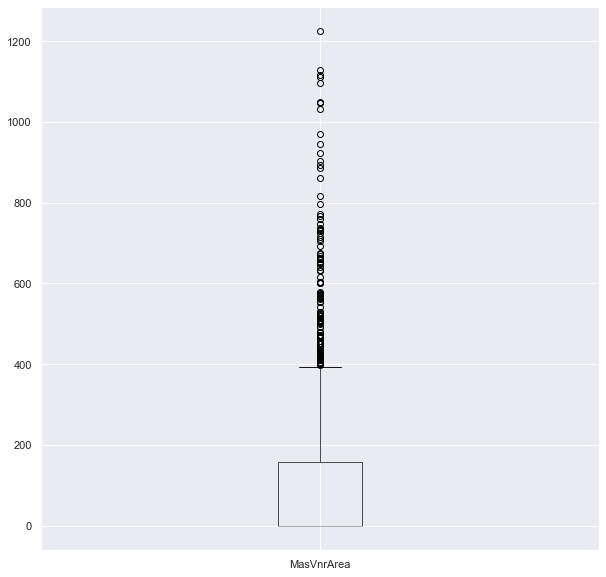

In [82]:
df_fix['MasVnrArea'] = np.where(df_fix['MasVnrArea'] > 1400, 0, df_fix['MasVnrArea'])
df_fix.boxplot(column ='MasVnrArea')

## Removing Outliners (BsmtFinSF1)

368.0

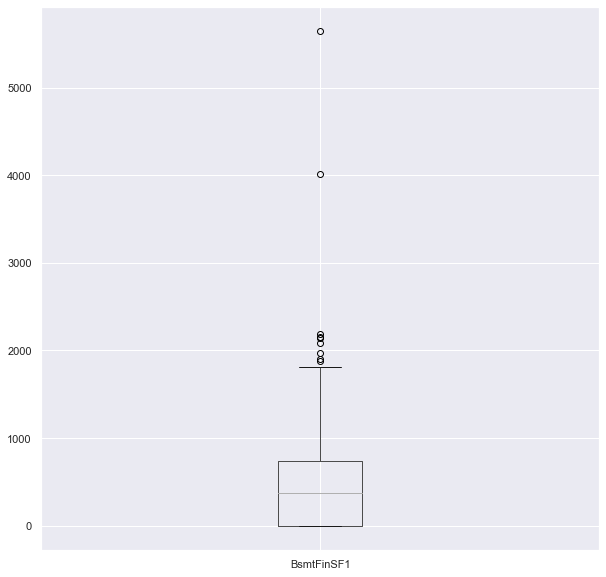

In [83]:
df_fix.boxplot(column ='BsmtFinSF1')
df_fix['BsmtFinSF1'].median()

C:\Users\GETGDN~1\AppData\Local\Temp/ipykernel_6308/2659952173.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fix['BsmtFinSF1'] = np.where(df_fix['BsmtFinSF1'] > 3000, 368, df_fix['BsmtFinSF1'])


<AxesSubplot:>

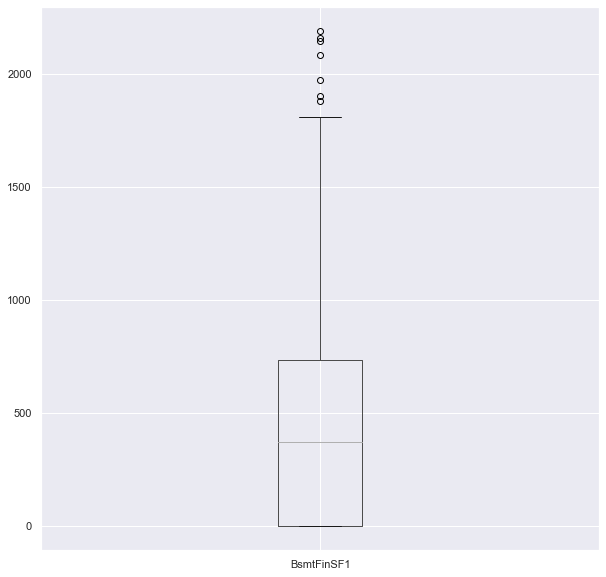

In [84]:
df_fix['BsmtFinSF1'] = np.where(df_fix['BsmtFinSF1'] > 3000, 368, df_fix['BsmtFinSF1'])
df_fix.boxplot(column ='BsmtFinSF1')

## Removing Outliners (Garagestandard)

1440.0

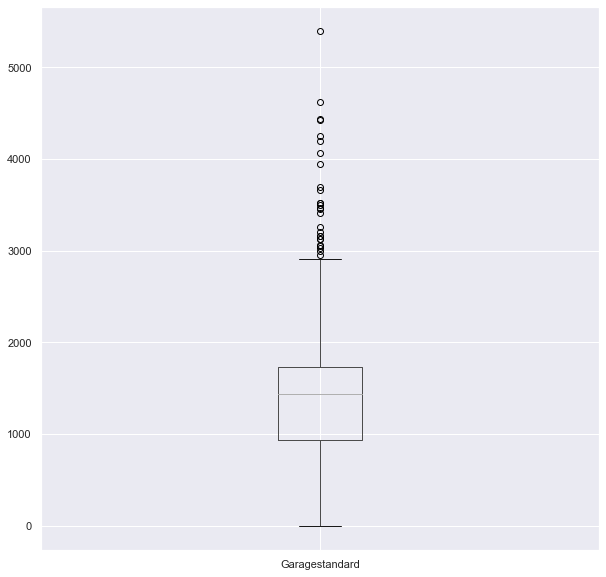

In [85]:
df_fix.boxplot(column ='Garagestandard')
df_fix['Garagestandard'].median()

C:\Users\GETGDN~1\AppData\Local\Temp/ipykernel_6308/2695771316.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fix['Garagestandard'] = np.where(df_fix['Garagestandard'] > 1400, 0,df_fix['Garagestandard'])


<AxesSubplot:>

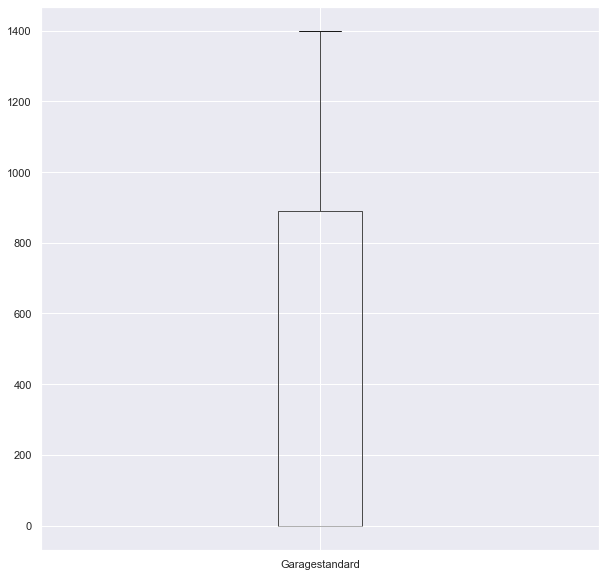

In [86]:
df_fix['Garagestandard'] = np.where(df_fix['Garagestandard'] > 1400, 0,df_fix['Garagestandard'])
df_fix.boxplot(column ='Garagestandard')

## Removing Outliners (BsmtFinSF1)

113152.0

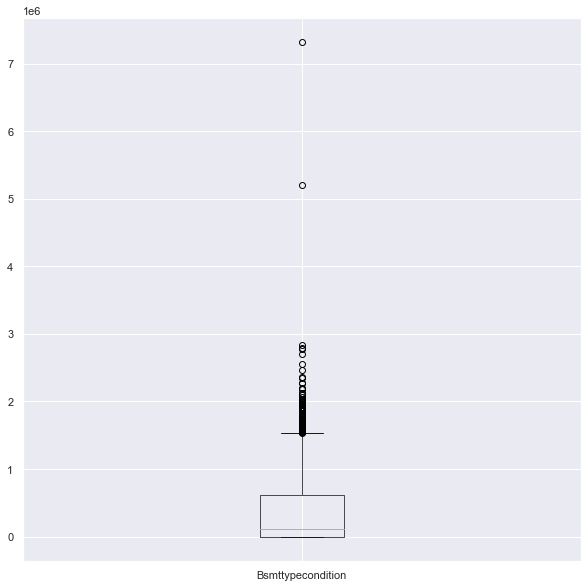

In [87]:
df_fix.boxplot(column ='Bsmttypecondition')
df_fix['Bsmttypecondition'].median()

C:\Users\GETGDN~1\AppData\Local\Temp/ipykernel_6308/1321098822.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fix['Bsmttypecondition'] = np.where(df_fix['Bsmttypecondition'] > 5000000, 113152,df_fix['Bsmttypecondition'])


<AxesSubplot:>

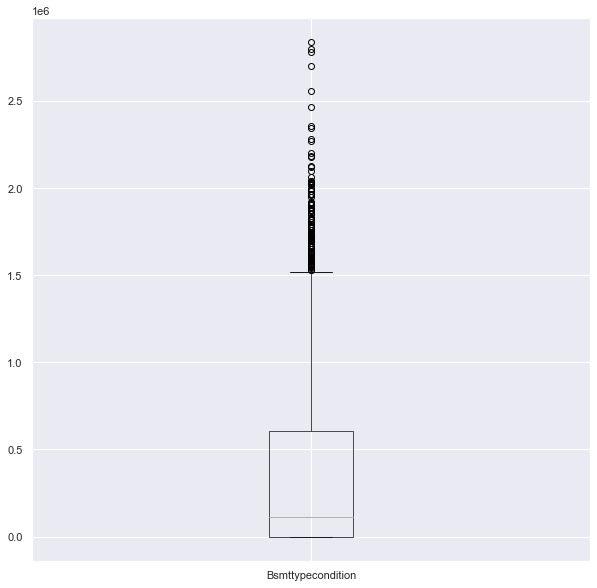

In [88]:
df_fix['Bsmttypecondition'] = np.where(df_fix['Bsmttypecondition'] > 5000000, 113152,df_fix['Bsmttypecondition'])
df_fix.boxplot(column ='Bsmttypecondition')


## Removing Outliners (BsmtFinSF1)

15920.0

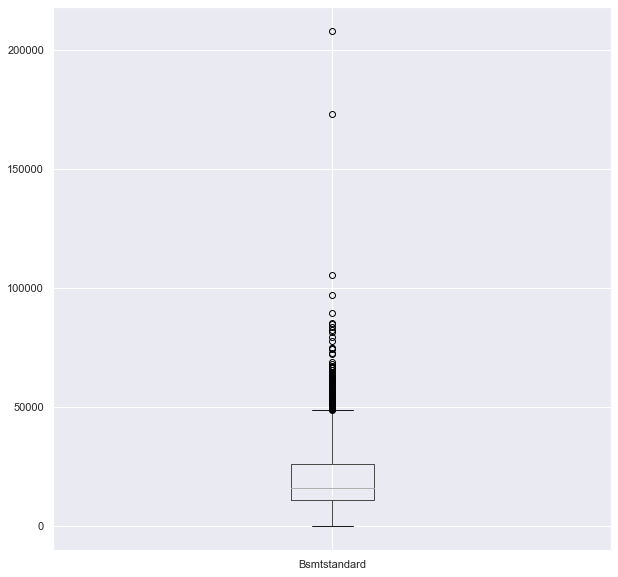

In [89]:
df_fix.boxplot(column ='Bsmtstandard')
df_fix['Bsmtstandard'].median()

C:\Users\GETGDN~1\AppData\Local\Temp/ipykernel_6308/2668957327.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fix['Bsmtstandard'] = np.where(df_fix['Bsmtstandard'] > 150000, 15920,df_fix['Bsmtstandard'])


<AxesSubplot:>

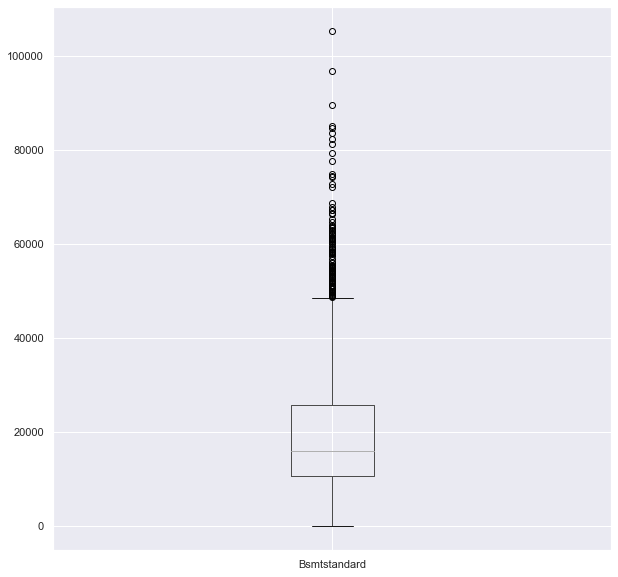

In [90]:
df_fix['Bsmtstandard'] = np.where(df_fix['Bsmtstandard'] > 150000, 15920,df_fix['Bsmtstandard'])
df_fix.boxplot(column ='Bsmtstandard')


As shown in the above bot plot, there are still outliners that can skew the variables. there more fixing is required

# BoxCox to further fix skewness

In [91]:
df_fix.skew()

MasVnrArea              2.443626
BsmtFinSF1              0.810657
Garagestandard          0.652365
Bsmttypecondition       1.562898
Bsmtstandard            1.652196
TotallivingPremiseSF    0.995519
dtype: float64

In [92]:
pt = PowerTransformer(method='yeo-johnson')
print(pt.fit(df_fix))
print(pt.lambdas_)

PowerTransformer()
[-0.26646824  0.22408792 -0.15752882  0.12141708  0.45624211  0.08267483]


In [93]:
df_combined['MasVnrArea'] = scipy.special.boxcox1p(df_combined['MasVnrArea'], -0.26646824)
df_combined['MasVnrArea']

df_combined['BsmtFinSF1'] = scipy.special.boxcox1p(df_combined['BsmtFinSF1'], 0.22408792)
df_combined['BsmtFinSF1']

df_combined['Garagestandard'] = scipy.special.boxcox1p(df_combined['Garagestandard'], -0.26761034)
df_combined['Garagestandard']

df_combined['Bsmttypecondition'] = scipy.special.boxcox1p(df_combined['Bsmttypecondition'], 0.12141708)
df_combined['Bsmttypecondition']

df_combined['Bsmtstandard'] = scipy.special.boxcox1p(df_combined['Bsmtstandard'], 0.45624211)
df_combined['Bsmtstandard']

df_combined['TotallivingPremiseSF'] = scipy.special.boxcox1p(df_combined['TotallivingPremiseSF'], 0.14500513)
df_combined['TotallivingPremiseSF']

0       13.063933
1       14.151125
2       12.167256
3       13.103583
4       13.027655
          ...    
2046    13.873867
2047    11.934940
2048    13.734444
2049    13.075309
2050    13.873867
Name: TotallivingPremiseSF, Length: 2051, dtype: float64

In [94]:
df_combined[['MasVnrArea','BsmtFinSF1','Garagestandard','Bsmttypecondition','Bsmtstandard','TotallivingPremiseSF']].skew()

MasVnrArea              0.460847
BsmtFinSF1             -0.392542
Garagestandard         -3.857213
Bsmttypecondition      -0.429794
Bsmtstandard            0.225987
TotallivingPremiseSF    0.144719
dtype: float64

# Machine Learning Model (Predicting)

In [95]:
X = df_combined
y = df_sp

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train.shape
y_train.shape

ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

# Machine Learning Model (Linear regression)

In [96]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

#crossvalidation 10 fold - linear regression
kf = KFold(5, shuffle = True, random_state = 100)
Cross_val_score = cross_val_score(lr, X_train, y_train, cv=kf, scoring ='neg_root_mean_squared_error')
Cross_val_score.mean()

-5.0108066630854163e+17

In [97]:
#crossvalidation 10 fold - linear regression
kf = KFold(5, shuffle = True, random_state = 100)
Cross_val_score = cross_val_score(lr, X_train, y_train, cv=kf, scoring ='neg_root_mean_squared_error')
Cross_val_score.mean() 

-5.0108066630854163e+17

In [98]:
#Linear Regression(rsme)
rsme = mean_squared_error(lr_pred, y_test)
rsme = -math.sqrt(rsme)
rsme

-9839852399856182.0

Linear regression model is expected to be very bad as one hot ending introduces a lot of collinearity and also, a lot of potention weakly correlated features that are too hard to hand pick

# Machine Learning Model (Lasso Regression)

In [99]:
#lassoRegressor
lasso = LassoCV(n_alphas=700)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)

#lassoRegressor(Cross Validation)
kf = KFold(10, shuffle = True, random_state = 100)
lasso_scores = cross_val_score(lasso, X_train, y_train, cv=3, scoring = 'neg_root_mean_squared_error')
lasso_scores.mean()

-30895.116494970567

In [100]:
#lassoRegressor(rsme)
rsme = mean_squared_error(lasso_pred, y_test)
rsme = -math.sqrt(rsme)
rsme

-25562.717227000587

Lasso regression model is expected to be better then linear regression and ridge regression as impact of the bad features (for eg, the onesintroduced by one hot encoding) on the test reults are not only reduced by the lambda, but the extremely weak ones are removed.

Difference in test and train score shows that the model is slightly underfitted.

# Machine Learning Model (Ridge Regression)

In [101]:
ridge = RidgeCV(alphas=np.linspace(.1, 10, 10))
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)

#RidgeRegressor(Cross Validation)
kf = KFold(5, shuffle = True, random_state = 42)
Cross_val_score = cross_val_score(ridge, X_train, y_train, cv=kf, scoring ='neg_root_mean_squared_error')
Cross_val_score.mean() #0.902

-31280.78715864439

In [102]:
#RidgeRegressor(rsme)
rsme = mean_squared_error(ridge_pred, y_test)
rsme = -math.sqrt(rsme)
rsme

-25606.953646230635

ridge regression model is expected to be better then linear regression as impact of the bad features (for eg, the onesintroduced by one hot encoding) on the test reults are reduced by the lambda

Difference in test and train score shows that the model is slightly underfitted.

Best Model is expectedly lasso regression for the aforementioned reasons. It is therefore, choosen for the test set

In [103]:
ridge_pred

array([127228.01000813, 214302.80955433, 328987.93462109, 124245.11116332,
       208914.85446215, 409142.43015775, 161770.35349353, 318713.42141078,
       164949.76760781,  98160.55576155, 124389.07425054, 231782.8695119 ,
       178771.3876196 , 127153.25487329, 120698.77996957,  98437.90133101,
        89151.60844931, 216153.31456029, 339907.66523223, 203608.40998019,
       279606.20437971, 220054.43704091, 124771.02148582, 135094.43428615,
       163882.59013225, 323330.71749535, 184929.8690602 , 142935.39771686,
       280626.47684443, 131358.61744758, 347500.20457395, 109332.62067064,
       119817.88813849, 180669.08249061, 191734.24751441, 105519.96720219,
       162945.14291359, 223718.29318798, 386773.48426503, 107515.61103639,
       308716.77593897, 177862.51391828, 323541.25610738, 175161.24348868,
        74889.79380956, 141210.07015601,  94083.32729238, 105589.35027349,
       315713.63410832, 120382.94545895, 328210.33675079,  83309.46548444,
       151696.76584508, 1

# Fitting Test Data.csv

In [104]:
import csv
df_test = pd.read_csv('test.csv')
df_test.head()

df_test.isnull().sum()
df_test_missing_value = df_test.isnull().sum()
df_test_missing_value = df_test_missing_value[(df_test_missing_value>0)]      
df_test_missing_value

#Mas Vnr Type (KNNImputer)
iterative_df = df_test[['Lot Area', '1st Flr SF', 'Lot Frontage']]
impute_it = IterativeImputer()
imputed_lot_front = impute_it.fit_transform(iterative_df)
imputed_lot_front = pd.DataFrame(imputed_lot_front, columns=['2', '1', '0'])
imputed_lot_front.columns = ["0","1","Lot Frontage"]
df_test["Lot Frontage"] = imputed_lot_front["Lot Frontage"]
df_test["Lot Frontage"].isnull().sum()

#Mas Vnr Type (KNNImputer)
df_test.rename(columns = {'Mas Vnr Type':'Mas_Vnr_Type'}, inplace = True)
df_test['Mas_Vnr_Type_map'] = df_test.Mas_Vnr_Type.map({'BrkCmn':0, 'BrkFace':1, 'CBlock':2, 'None':3, 'Stone':4})
knn_impute = KNNImputer(n_neighbors=45)
df_knn = knn_impute.fit_transform(df_test[['Mas_Vnr_Type_map']])
df_knn = pd.DataFrame(df_knn, columns=['Mas_Vnr_Type'])
df_knn = df_knn.round()
df_test["Mas_Vnr_Type"] = df_knn["Mas_Vnr_Type"]
print(df_test["Mas_Vnr_Type"])
df_test = df_test.drop('Mas_Vnr_Type_map', axis =1)
df_test["Mas_Vnr_Type"].isnull().sum()

#Mas Vnr Area (Fillna = 0 - all Cbloack mas Vnr type has nan value; 0 squaremeter for each cblock)
df_Mas_mean = df_test[['Mas_Vnr_Type', 'Mas Vnr Area']]
df_BrkCmn_mean = df_Mas_mean.loc[df_Mas_mean['Mas_Vnr_Type'] == 0]
df_BrkFace_mean = df_Mas_mean.loc[df_Mas_mean['Mas_Vnr_Type'] == 1]
df_CBlock_mean = df_Mas_mean.loc[df_Mas_mean['Mas_Vnr_Type'] == 2]
df_None_mean = df_Mas_mean.loc[df_Mas_mean['Mas_Vnr_Type'] == 3]
df_Stone_mean = df_Mas_mean.loc[df_Mas_mean['Mas_Vnr_Type'] == 4]

df_BrkCmn_mean_sum = df_BrkCmn_mean.isnull().sum()
df_BrkFace_mean_sum = df_BrkFace_mean.isnull().sum()
df_CBlock_mean_sum = df_CBlock_mean.isnull().sum() #Shows that only Cblock has Nan Values
df_None_mean_sum = df_None_mean.isnull().sum()
df_Stone_mean_sum = df_Stone_mean.isnull().sum() 

df_test['Mas Vnr Area'] = df_test['Mas Vnr Area'].fillna(0)
print(df_test["Mas Vnr Area"])
df_test["Mas Vnr Area"].isnull().sum()

#Garage Qual (KNNImputer)
df_test.rename(columns = {'Garage Qual':'GarageQual'}, inplace = True)
df_test['GarageQual'] = df_test.GarageQual.map({'Ex':0, 'Gd':1, 'TA':2, 'Fa':3, 'Po':4, 'NA':5})
knn_impute = KNNImputer(n_neighbors=45)
df_knn1 = knn_impute.fit_transform(df_test[['GarageQual']])
df_knn1 = pd.DataFrame(df_knn1, columns=['0'])
df_knn1 = df_knn1.round()
df_knn1.columns = ['Garage Qual']
df_test["GarageQual"] = df_knn1["Garage Qual"]
print(df_test["GarageQual"])
df_test["GarageQual"].isnull().sum()

#Garage Cond (Mode - same nan replacement as KNNimputer)
df_test.rename(columns = {'Garage Cond':'GarageCond'}, inplace = True)
df_test['GarageCond'] = df_test['GarageCond'].fillna(df_test['GarageCond'].mode()[0])
df_test['GarageCond'] = df_test.GarageCond.map({'Ex':0, 'Gd':1, 'TA':2, 'Fa':3, 'Po':4, 'NA':5})
print(df_test["GarageCond"])
df_test["GarageCond"].isnull().sum()


#Bsmt Qual (KNNImputer)
df_test.rename(columns = {'Bsmt Qual':'Bsmt_Qual'}, inplace = True)
df_test['Bsmt_Qual'] = df_test.Bsmt_Qual.map({'Ex':0, 'Gd':1, 'TA':2, 'Fa':3, 'Po':4, 'NA':5})
knn_impute = KNNImputer(n_neighbors=45)
df_knn2 = knn_impute.fit_transform(df_test[['Bsmt_Qual']])
df_knn2 = pd.DataFrame(df_knn2, columns=['0'])
df_knn2 = df_knn2.round()
df_knn2.columns = ['Bsmt_Qual']
df_test["Bsmt_Qual"] = df_knn2["Bsmt_Qual"]
print(df_test["Bsmt_Qual"])
df_test["Bsmt_Qual"].isnull().sum()

#Bsmt Cond (KNNImputer)
df_test.rename(columns = {'Bsmt Cond':'Bsmt_Cond'}, inplace = True)
df_test['Bsmt_Cond'] = df_test.Bsmt_Cond.map({'Ex':0, 'Gd':1, 'TA':2, 'Fa':3, 'Po':4, 'NA':5})
print(df_test['Bsmt_Cond'])
knn_impute = KNNImputer(n_neighbors=45)
df_knn3 = knn_impute.fit_transform(df_test[['Bsmt_Cond']])
df_knn3 = pd.DataFrame(df_knn3, columns=['0'])
df_knn3 = df_knn3.round()
df_knn3.columns = ['Bsmt_Cond']
df_test["Bsmt_Cond"] = df_knn3["Bsmt_Cond"]
print(df_test["Bsmt_Cond"])
df_test["Bsmt_Cond"].isnull().sum()

#Bsmt Exposure (KNNImputer)
df_test.rename(columns = {'Bsmt Exposure':'BsmtExposure'}, inplace = True)
df_test['BsmtExposure'] = df_test.BsmtExposure.map({'Gd':0, 'Av':1, 'Mn':2, 'No':3, 'NA':4})
print(df_test['BsmtExposure'])
knn_impute = KNNImputer(n_neighbors=45)
df_knn4 = knn_impute.fit_transform(df_test[['BsmtExposure']])
df_knn4 = pd.DataFrame(df_knn4, columns=['0'])
df_knn4 = df_knn4.round()
df_knn4.columns = ['BsmtExposure']
df_test["BsmtExposure"] = df_knn4["BsmtExposure"]
print(df_test["BsmtExposure"])
df_test["BsmtExposure"].isnull().sum()

#BsmtFin Type 1 (KNNImputer)
df_test.rename(columns = {'BsmtFin Type 1':'BsmtFinType1'}, inplace = True)
df_test['BsmtFinType1'] = df_test.BsmtFinType1.map({'GLQ':6, 'ALQ':5 , 'BLQ':4, 'Rec':3, 'Lwq':2, 'Unf':1, 'NA':0})
print(df_test['BsmtFinType1'])
knn_impute = KNNImputer(n_neighbors=45)
df_knn5 = knn_impute.fit_transform(df_test[['BsmtFinType1']])
df_knn5 = pd.DataFrame(df_knn5, columns=['0'])
df_knn5 = df_knn5.round()
df_test["BsmtFinType1"] = df_knn5["0"]
print(df_test["BsmtFinType1"])
df_test["BsmtFinType1"].isnull().sum()

#BsmtFin SF 1 (KNNImputer)
dftrans = df_test[['BsmtFinType1', 'BsmtFin SF 1']]
dftrans1 = dftrans.loc[dftrans['BsmtFin SF 1'].isna()] #The only null value in this variable correspond with an Average Quality Type 1 Basement(ALQ:2)
dftrans2 = dftrans.loc[dftrans['BsmtFinType1'] == 2]
dftrans2 = dftrans2['BsmtFin SF 1'].median()#median of SF mode of SF of all unfinished basement type 1 is 377
df_test['BsmtFin SF 1'] = df_test['BsmtFin SF 1'].fillna(377.0)#replace missing value with Median
print(df_test["BsmtFin SF 1"])
df_test["BsmtFin SF 1"].isnull().sum()

#BsmtFin Type 2 (KNNImputer)
df_test.rename(columns = {'BsmtFin Type 2':'BsmtFinType2'}, inplace = True)
df_test['BsmtFinType2'] = df_test.BsmtFinType2.map({'GLQ':6, 'ALQ':5 , 'BLQ':4, 'Rec':3, 'Lwq':2, 'Unf':1, 'NA':0})
print(df_test['BsmtFinType2'])
knn_impute = KNNImputer(n_neighbors=45)
df_knn6 = knn_impute.fit_transform(df_test[['BsmtFinType2']])
df_knn6 = pd.DataFrame(df_knn6, columns=['0'])
df_knn6 = df_knn6.round()
df_test["BsmtFinType2"] = df_knn6["0"]
print(df_test["BsmtFinType2"])
df_test["BsmtFin SF 1"].isnull().sum()


#BsmtFin SF 2 (Mode based on basement type 2 - Basement Squarefoot 2 nan because basement type 2 is unfinished)
dftrans = df_test[['BsmtFinType2', 'BsmtFin SF 2']]
dftrans1 = dftrans.loc[dftrans['BsmtFin SF 2'].isna()] #The only null value in this variable correspond with an Unfinshed Type 2 basement(Unf:5)
dftrans2 = dftrans.loc[dftrans['BsmtFinType2'] == 2] #shows that majority of values are 0 (mean/median not viable)
dftrans2 = dftrans2['BsmtFin SF 2'].mode() #mode of SF of all unfinished basement type 2 is 0
df_test['BsmtFin SF 2'] = df_test['BsmtFin SF 2'].fillna(0)#replace missing value with Median
print(df_test["BsmtFin SF 2"])
df_test["BsmtFin SF 2"].isnull().sum()

#Total Bsmt SF (Median base on basement type 1 - value is nan because basement 1 is unfinished)
dftrans = df_test[['BsmtFinType2', 'BsmtFinType1', 'Total Bsmt SF']]
dftrans1 = dftrans.loc[dftrans['Total Bsmt SF'].isna()] #Null Value is associate with a finished Average type 1 Basement and an unfinished type 2 basement
dftrans2 = dftrans.loc[dftrans['BsmtFinType1'] == 2] #Use finished Type 1 basement to fill NaN
dftrans2 = dftrans2['Total Bsmt SF'].median() #median of total SF of all unfinished basement type 1 is 919
df_test['Total Bsmt SF'] = df_test['Total Bsmt SF'].fillna(919)#replace missing value with Median
print(df_test["Total Bsmt SF"])
df_test["Total Bsmt SF"].isnull().sum()

#Bsmt Full Bath (KNNImputer)
df_test.rename(columns = {'Bsmt Full Bath':'BsmtFullBath'}, inplace = True)
print(df_test['BsmtFullBath'])
knn_impute = KNNImputer(n_neighbors=45)
df_knn7 = knn_impute.fit_transform(df_test[['BsmtFullBath']])
df_knn7 = pd.DataFrame(df_knn7, columns=['0'])
df_knn7 = df_knn7.round()
df_test["BsmtFullBath"] = df_knn7["0"]
print(df_test["BsmtFullBath"])
df_test["BsmtFullBath"].isnull().sum()

#Bsmt Half Bath (KNNImputer)
df_test.rename(columns = {'Bsmt Half Bath':'BsmtHalfBath'}, inplace = True)
print(df_test['BsmtHalfBath'])
knn_impute = KNNImputer(n_neighbors=45)
df_knn8 = knn_impute.fit_transform(df_test[['BsmtHalfBath']])
df_knn8 = pd.DataFrame(df_knn8, columns=['0'])
df_knn8 = df_knn8.round()
df_test["BsmtHalfBath"] = df_knn8["0"]
print(df_test["BsmtHalfBath"])
df_test["BsmtHalfBath"].isnull().sum()

#FirePlace Qu (KNNImputer)
df_test.rename(columns = {'Fireplace Qu':'FireplaceQu'}, inplace = True)
df_test['FireplaceQu'] = df_test.FireplaceQu.map({'Ex':0, 'Gd':1, 'TA':2, 'Fa':3, 'Po':4, 'NA':5})
knn_impute = KNNImputer(n_neighbors=20)
df_knn8 = knn_impute.fit_transform(df_test[['FireplaceQu']])
df_knn8 = pd.DataFrame(df_knn8, columns=['0'])
df_knn8 = df_knn8.round()
df_test["FireplaceQu"] = df_knn8["0"]
print(df_test["FireplaceQu"])
df_test["FireplaceQu"].isnull().sum()

#Garage Cars, Garage Area (IterativeImputer - linear regression with Garage Type, Garage Cars, Garage Area)
iterative_df = df_test[['Garage Type', 'Garage Cars', 'Garage Area']]
iterative_df_cor = iterative_df.corr(method='pearson')
iterative_df.rename(columns = {'Garage Type':'GarageType'}, inplace = True)
iterative_df['GarageType'] = iterative_df.GarageType.map({'2Types':0, 'Attchd':1, 'Basment':2, 'Builtin':3, 'CarPort':4, 'Detchd':5, 'NA':6})
impute_it = IterativeImputer()
imputed_df = impute_it.fit_transform(iterative_df)
imputed_df = pd.DataFrame(imputed_df, columns=['Garage Type', 'Garage Cars', 'Garage Area'])
imputed_df['Garage Cars'] = imputed_df['Garage Cars'].round()
df_test[["Garage Cars","Garage Area"]] = imputed_df[["Garage Cars","Garage Area"]]
print(df_test[["Garage Cars","Garage Area"]])
df_test["FireplaceQu"].isnull().sum()

#Garage Type (KNNImputer)
df_test.rename(columns = {'Garage Type':'GarageType'}, inplace = True)
df_test['GarageType'] = df_test.GarageType.map({'2Types':0, 'Attchd':1, 'Basment':2, 'Builtin':3, 'CarPort':4, 'Detchd':5, 'NA':6})
print(df_test['GarageType'])
knn_impute = KNNImputer(n_neighbors=20)
df_knn9 = knn_impute.fit_transform(df_test[['GarageType']])
df_knn9 = pd.DataFrame(df_knn9, columns=['0'])
df_knn9 = df_knn9.round()
df_test["GarageType"] = df_knn9["0"]
print(df_test["GarageType"])
df_test["FireplaceQu"].isnull().sum()

#Garage Finish (KNNImputer)
df_test.rename(columns = {'Garage Finish':'GarageFinish'}, inplace = True)
df_test['GarageFinish'] = df_test.GarageFinish.map({'Fin':0, 'RFn':1, 'Unf':2, 'NA':3})
print(df_test['GarageFinish'])
kaggle_df = df_test
knn_impute = KNNImputer(n_neighbors=20)
df_knn10 = knn_impute.fit_transform(df_test[['GarageFinish']])
df_knn10 = pd.DataFrame(df_knn10, columns=['0'])
df_knn10 = df_knn10.round()
df_test["GarageFinish"] = df_knn10["0"]
print(df_test["GarageFinish"])
df_test["GarageFinish"].isnull().sum()

#Bsmt Unf SF (Median based on Basement type 2)
dftrans = df_test[['BsmtFinType2', 'BsmtFinType1', 'Bsmt Unf SF']]
dftrans1 = dftrans.loc[dftrans['Bsmt Unf SF'].isna()] #The null value in this variable is the corresponding Work in Progress of the type 2 Basement
dftrans2 = dftrans.loc[dftrans['BsmtFinType2'] == 5] 
dftrans2 = dftrans2['Bsmt Unf SF'].median() #median of SF of all unfinshed basement type 2 is 511.5
df_test['Bsmt Unf SF'] = df_test['Bsmt Unf SF'].fillna(511.5)#replace missing value with Median
print(df_test["Bsmt Unf SF"])
df_test["Bsmt Unf SF"].isnull().sum()

#Garage Yr Blt (IterativeImputer - linear regression with Garage Yr Built, Garage Cars, Garage Area)
iterative_df = df_test[['Garage Cars', 'Garage Area', 'Garage Yr Blt']]
impute_it = IterativeImputer()
imputed_gr_yr = impute_it.fit_transform(iterative_df)
imputed_gr_yr = pd.DataFrame(imputed_gr_yr, columns=['Garage Cars', 'Garage Area', 'Garage Yr Blt'])
imputed_gr_yr = imputed_gr_yr.round()
df_test["Garage Yr Blt"] = imputed_gr_yr["Garage Yr Blt"]
print(df_test["Garage Yr Blt"])
df_test["Garage Yr Blt"].isnull().sum()


df_test.columns = df_test.columns.str.replace(' ', '')
df_test.select_dtypes(include=['object']).columns.tolist()

df_test['ExterQual'] = df_test.ExterQual.map({'Gd':2, 'TA':1, 'Ex':3, 'Fa':0})
df_test['ExterCond'] = df_test.ExterCond.map({'TA':2, 'Gd':3, 'Fa':1, 'Ex':4, 'Po':0})
df_test['HeatingQC'] = df_test.HeatingQC.map({'Ex':4, 'TA':2, 'Gd':3, 'Fa':1, 'Po':0})
df_test['KitchenQual'] = df_test.KitchenQual.map({'Gd':3, 'TA':2, 'Fa':0, 'Ex':4, 'Po':1})
df_test['PoolQC'] = df_test.PoolQC.map({'Fa':0, 'Gd':2, 'Ex':3, 'TA':1})

df_test['FireplaceQu'] = df_test.FireplaceQu.map({0:5, 1:4, 2:3, 3:2, 4:1, 5:0}) #({'Gd':0, 'Av':1, 'Mn':2, 'No':3, 'NA':4})
df_test['BsmtExposure'] = df_test.BsmtExposure.map({0:3, 1:2, 2:1, 3:0, 4:0}) #({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0})
df_test['Bsmt_Cond'] = df_test.Bsmt_Cond.map({0:5, 1:4, 2:3, 3:2, 4:1, 5:0}) #({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0})
df_test['Bsmt_Qual'] = df_test.Bsmt_Qual.map({0:5, 1:4, 2:3, 3:2, 4:1, 5:0}) #({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0})
df_test['GarageCond'] = df_test.GarageCond.map({0:5, 1:4, 2:3, 3:2, 4:1, 5:0}) #({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0})
df_test['GarageQual'] = df_test.GarageQual.map({0:5, 1:4, 2:3, 3:2, 4:1, 5:0}) #({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0})

df_test['Mas_Vnr_Type'] = df_test.Mas_Vnr_Type.map({0:'BrkCmn', 1:'BrkFace', 2:'CBlock', 3:'None', 4:'Stone'})
df_test['GarageType'] = df_test.GarageType.map({0:'2Types', 1:'Attchd', 2:'Basment', 3:'Builtin', 4:'CarPort', 5:'Detchd', 6:'NA'})
df_test['GarageFinish'] = df_test.GarageFinish.map({0:'Fin', 1:'RFn', 2:'Unf', 3:'NA'})

df_test['KitchenQual'].unique()

df_test = df_test.drop( columns = ['PoolQC', 'MSSubClass','LowQualFinSF','BsmtHalfBath',
                                           'MiscVal', 'MiscFeature',
                                           'Fence', 'Condition2', 'Utilities'])

df_test['TotallivingPremiseSF'] = (df_test['GrLivArea'] + df_test['OpenPorchSF'] + df_test['EnclosedPorch'] + df_test['3SsnPorch'] + df_test['ScreenPorch']  + df_test['PoolArea'] + df_test['WoodDeckSF']) 
df_test['Bsmtstandard'] = df_test['TotalBsmtSF'] * (df_test['Bsmt_Qual']**2 + df_test['Bsmt_Cond'] + df_test['BsmtExposure']*2) #remove bsmt qual
df_test['Bsmttypecondition'] = df_test['BsmtFinSF1'] * df_test['BsmtFinType1']**4  + df_test['BsmtFinSF2'] * df_test['BsmtFinType2']**3 
df_test['Garagestandard'] = df_test['GarageArea'] * df_test['GarageQual']  

df_test['TotallivingPremiseSF'].median()
df_test['TotallivingPremiseSF'] = np.where(df_test['TotallivingPremiseSF'] > 4500, 1606, df_test['TotallivingPremiseSF'])

df_test['MasVnrArea'].median()
df_test['MasVnrArea'] = np.where(df_test['MasVnrArea'] > 1200, 0, df_test['MasVnrArea'])

df_test['BsmtFinSF1'].median()
df_test['BsmtFinSF1'] = np.where(df_test['BsmtFinSF1'] > 2000, 373, df_test['BsmtFinSF1'])

df_test['Bsmttypecondition'].median()
df_test['Bsmttypecondition'] = np.where(df_test['Bsmttypecondition'] > 2500000, 100349,df_test['Bsmttypecondition'])

df_test['Bsmtstandard'].median()
df_test['Bsmtstandard'] = np.where(df_test['Bsmtstandard'] > 80000, 15128,df_test['Bsmtstandard'])

df_test['Garagestandard'].median()
df_test['Garagestandard'] = np.where(df_test['Garagestandard'] > 2900, 1410,df_test['Garagestandard'])

df_fix = df_test[['Garagestandard','Bsmtstandard','Bsmttypecondition','MasVnrArea','BsmtFinSF1','TotallivingPremiseSF']]
pt = PowerTransformer(method='yeo-johnson')
print(pt.fit(df_fix))
print(pt.lambdas_)

df_fix

df_test['MasVnrArea'] = scipy.special.boxcox1p(df_test['MasVnrArea'], 0.80864333)
df_test['MasVnrArea']

df_test['BsmtFinSF1'] = scipy.special.boxcox1p(df_test['BsmtFinSF1'], 0.47000019)
df_test['BsmtFinSF1']

df_test['Garagestandard'] = scipy.special.boxcox1p(df_test['Garagestandard'], 0.12772025)
df_test['Garagestandard']

df_test['Bsmttypecondition'] = scipy.special.boxcox1p(df_test['Bsmttypecondition'], -0.27217518)
df_test['Bsmttypecondition']

df_test['Bsmtstandard'] = scipy.special.boxcox1p(df_test['Bsmtstandard'], 0.24369367)
df_test['Bsmtstandard']

df_test['TotallivingPremiseSF'] = scipy.special.boxcox1p(df_test['TotallivingPremiseSF'], 0.09015028)
df_test['TotallivingPremiseSF']

df_id = df_test['Id']

df_test = df_test.drop(columns =['Id'])

df_test = pd.get_dummies(df_test)
#Machine Learning Model
#Combined x value
X = df_test

X_train, X_test= train_test_split(X, random_state=42)

X_train.shape

ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

df_train = list(df_combined.columns)
df_ttest = list(df_test.columns)


columns_add = [col for col in df_test if col not in df_combined]
columns_add

zero_list = [0 for i in range(int(df_test.shape[0]))]
len(zero_list)
for col in columns_add:
    df_test[col] = zero_list[:]
    

df_test = df_test.drop(columns = [ 'Id', 'PID',
 'LotFrontage',
 'LotArea',
 'YearRemod/Add',
 'Bsmt_Cond',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'TotalBsmtSF',
 'GrLivArea',
 'Fireplaces',
 'GarageArea',
 'GarageQual',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'RoofMatl_Metal',
 'RoofMatl_Roll',
 'Exterior1st_PreCast',
 'Exterior2nd_Other',
 'Exterior2nd_PreCast',
 'Heating_Floor',
 'SaleType_VWD'] )

0      3.0
1      3.0
2      3.0
3      3.0
4      1.0
      ... 
873    3.0
874    1.0
875    3.0
876    3.0
877    3.0
Name: Mas_Vnr_Type, Length: 878, dtype: float64
0        0.0
1        0.0
2        0.0
3        0.0
4      247.0
       ...  
873      0.0
874    410.0
875      0.0
876      0.0
877      0.0
Name: Mas Vnr Area, Length: 878, dtype: float64
0      4.0
1      2.0
2      2.0
3      3.0
4      2.0
      ... 
873    2.0
874    2.0
875    2.0
876    2.0
877    2.0
Name: GarageQual, Length: 878, dtype: float64
0      4
1      2
2      2
3      2
4      2
      ..
873    2
874    2
875    2
876    2
877    2
Name: GarageCond, Length: 878, dtype: int64
0      3.0
1      1.0
2      1.0
3      2.0
4      1.0
      ... 
873    2.0
874    2.0
875    2.0
876    2.0
877    2.0
Name: Bsmt_Qual, Length: 878, dtype: float64
0      2.0
1      2.0
2      1.0
3      2.0
4      2.0
      ... 
873    2.0
874    2.0
875    2.0
876    2.0
877    2.0
Name: Bsmt_Cond, Length: 878, dtype: float6

C:\Users\get gd nub\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
C:\Users\GETGDN~1\AppData\Local\Temp/ipykernel_6308/3784749030.py:196: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iterative_df['GarageType'] = iterative_df.GarageType.map({'2Types':0, 'Attchd':1, 'Basment':2, 'Builtin':3, 'CarPort':4, 'Detchd':5, 'NA':6})


KeyError: "['Id'] not found in axis"

In [105]:
kaggle_df.to_csv('kaggle.csv', index = False)

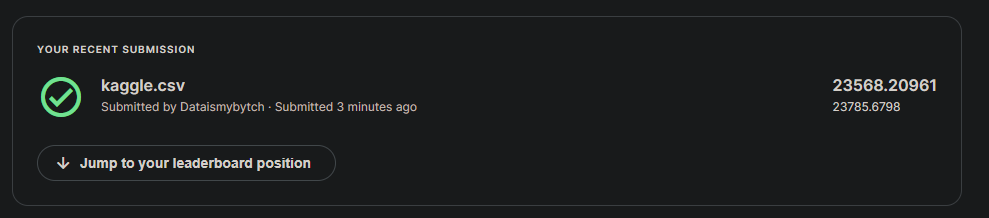

In [106]:
from IPython.display import Image
Image(filename='kaggle score.png') 

## Conclusions 

Lasso regression on train set (-25562.717227000587), is slightly underfitted as compared to the prediction on the test set (-23568.20961).

Underfitting happens when my model is too simplistic, which could be due to a lack of training time, input features, or regularization. When a model is underfitted, it is unable to identify the main trend in the data, leading to training errors and poor model performance. A model cannot be used for classification or prediction if it does not generalize adequately to new data. The ability to apply machine learning algorithms every day to make predictions and classify data is ultimately due to the generalization of a model to fresh data. My model's underfitting is likely due to high bias and low variance.
